In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 用来正常显示中文标签 Times New Roman ，Arial Unicode MS
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# %load_ext autoreload
## Set drawing coordinates and font parameters
parameters = {'axes.labelsize': 15,
             'axes.titlesize': 15,
             'figure.titlesize': 18}
plt.rcParams.update(parameters)

%load_ext autoreload
%autoreload 2

## Significance mutation gene workflows
- The significance of somatic mutations (SNVs, indels) was determined using three published methods: MutSig2CV and oncodriveCLUST algorithms
- The recurrently mutated genes (≥5 affected cases) detected across our cohort and Genes with q values <0.1 were considered to be significantly mutated.
- We filter the recurrently mutated genes (≥5 affected cases) detected in the our cohort.
- We annotated CCA drivers with a combination of driver lists: 
  - (1) significantly mutated genes in CCA from seven previously published papers (references); 
  - (2) list of drivers from PanCancer and PanSoftware analyses, subsetting to only those genes implicated as CCA-related; 
  - (3) New drivers identified from the our CCA cohort in this study. 
- To identify CCA-associated drivers with significant similarities and differences across different cohorts:
  - We performed Pearson correlation analysis on the frequency of mutations in CCA-associated genes in seven cohorts
  - Two-sided Fisher’s exact tests was performed and a FDR cutoff of 0.01 was considered as significant difference,  
  - The reported genes which included only those with high mutation frequency in each cohort. 

In [2]:
## Calling R environment to visualization
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
%load_ext rpy2.ipython

## Scatter plot of the significant mutation genes

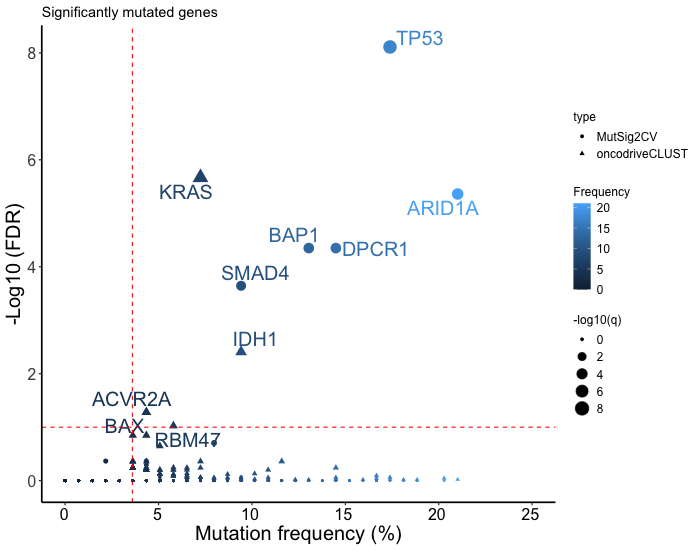

In [5]:
%%R -h 550 -w 700  # Set width and height

library ("readxl")
require("ggrepel")
require("ggplot2")
library("dplyr")
library("IRdisplay")
## --------------- SMGs scatter of the two combined data   ---------------
MutSigCV_Mutsig <- read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/SMGs.xlsx", sheet = 1)
colnames(MutSigCV_Mutsig)
MutSigCV_Mutsig = filter(MutSigCV_Mutsig,  n_nonsilent < 30 )
# genes$significant <- ifelse((genes$iCC_sig > 1.301| genes$eCC_sig > 1.301 ), "P_value < 0.05", "Not Sig")
MutSigCV_Mutsig$significant <-ifelse((MutSigCV_Mutsig$q < 0.1 & MutSigCV_Mutsig$n_nonsilent > 5 ), 'SMGs','Non_SMGs')
MutSigCV_Mutsig$Frequency = MutSigCV_Mutsig$n_nonsilent /138*100
MutSigCV_Mutsig$Mutation_count = MutSigCV_Mutsig$n_nonsilent
p = ggplot(MutSigCV_Mutsig, aes(x = Frequency, y = -log10(q), color = Frequency)) +
  geom_point(aes(color = Frequency,size = -log10(q), shape = type)) +
  # scale_colour_gradient(low = "blue", high = "yellow") +
  scale_fill_gradient(low = "blue", high = "yellow") +
  # scale_color_manual(values = c("grey",'red',"royalblue", 'blue')) +
  theme_bw(base_size = 12) + theme(legend.position = "right") +
  geom_text_repel( 
    data = subset(MutSigCV_Mutsig, MutSigCV_Mutsig$q < 0.1 & MutSigCV_Mutsig$n_nonsilent >= 5  ),
    aes(label = gene),
    size = 7,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines")) + 
  geom_hline(yintercept = 1,color = 'red', linetype="dashed")+
  geom_vline(xintercept = 3.6,color = 'red', linetype="dashed")+
  xlim(0,25) #+
# ylim(0,2.5) +
# scale_y_continuous(limits = c(0, 3.5))
# scale_x_continuous(breaks=seq(0, 30, 5))

p +
  ## Set title, labels
  # ggtitle("Significantly mutated genes")+
  labs(title="Significantly mutated genes", x="Mutation frequency (%)", y = "-Log10 (FDR)")+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
  theme(axis.text.x=element_text(angle=0,hjust = 0.6,colour="black",family="Arial",size=16), 
        axis.title.x=element_text(angle=0,hjust = 0.5,colour="black",family="Arial",size=20),
        axis.text.y=element_text(family="Arial",size=16,face="plain"),
        axis.title.y=element_text(family="Arial",size = 20,face="plain"), 
        panel.border = element_blank(),axis.line = element_line(colour = "black",size=0.8), 
        legend.text=element_text(face="plain", family="Arial", colour="black", size=12),
        legend.title=element_text(face="plain", family="Arial", colour="black", size=12),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())

## MutSig2CV SMGs
- The recurrently mutated genes (≥5 affected cases) and q values <0.1
- The recurrently mutated genes (≥5 affected cases) and p values <0.001

### The recurrently mutated genes (≥5 affected cases) and q values <0.1

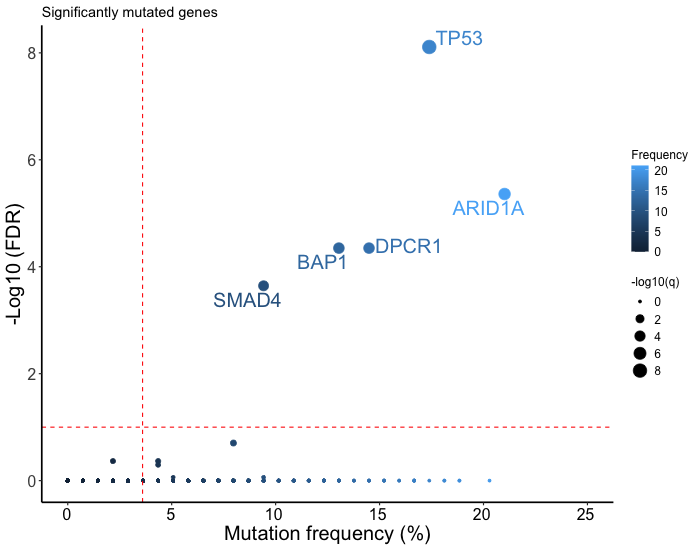

In [23]:
%%R -h 550 -w 700  # Set width and height

library ("readxl")
require("ggrepel")
require("ggplot2")
library("dplyr")
library("IRdisplay")

## ---------------  MutSig2CV SMGs   ---------------
MutSigCV_Mutsig <- read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/Significant_ mutation_gene.xlsx", sheet = 2)
colnames(MutSigCV_Mutsig)
MutSigCV_Mutsig = filter(MutSigCV_Mutsig,  n_nonsilent < 30 )
# genes$significant <- ifelse((genes$iCC_sig > 1.301| genes$eCC_sig > 1.301 ), "P_value < 0.05", "Not Sig")
MutSigCV_Mutsig$significant <-ifelse((MutSigCV_Mutsig$q < 0.1 & MutSigCV_Mutsig$n_nonsilent > 5 ), 'SMGs','Non_SMGs')
MutSigCV_Mutsig$Frequency = MutSigCV_Mutsig$n_nonsilent /138*100
MutSigCV_Mutsig$Mutation_count = MutSigCV_Mutsig$n_nonsilent
p = ggplot(MutSigCV_Mutsig, aes(x = Frequency, y = -log10(q), color = Frequency)) +
    geom_point(aes(color = Frequency,size = -log10(q))) +
    # scale_colour_gradient(low = "blue", high = "yellow") +
    scale_fill_gradient(low = "blue", high = "yellow") +
    # scale_color_manual(values = c("grey",'red',"royalblue", 'blue')) +
    theme_bw(base_size = 12) + theme(legend.position = "right") +
    geom_text_repel( 
      data = subset(MutSigCV_Mutsig, MutSigCV_Mutsig$q < 0.1 & MutSigCV_Mutsig$n_nonsilent >= 5  ),
      aes(label = gene),
      size = 7,
      box.padding = unit(0.35, "lines"),
      point.padding = unit(0.3, "lines")) + 
    geom_hline(yintercept = 1,color = 'red', linetype="dashed")+
    geom_vline(xintercept = 3.6,color = 'red', linetype="dashed")+
    xlim(0,25) #+
    # ylim(0,2.5) +
    # scale_y_continuous(limits = c(0, 3.5))
    # scale_x_continuous(breaks=seq(0, 30, 5))

p +
    ## Set title, labels
    # ggtitle("Significantly mutated genes")+
    labs(title="Significantly mutated genes", x="Mutation frequency (%)", y = "-Log10 (FDR)")+
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
    theme(axis.text.x=element_text(angle=0,hjust = 0.6,colour="black",family="Arial",size=16), 
          axis.title.x=element_text(angle=0,hjust = 0.5,colour="black",family="Arial",size=20),
          axis.text.y=element_text(family="Arial",size=16,face="plain"),
          axis.title.y=element_text(family="Arial",size = 20,face="plain"), 
          panel.border = element_blank(),axis.line = element_line(colour = "black",size=0.8), 
          legend.text=element_text(face="plain", family="Arial", colour="black", size=12),
          legend.title=element_text(face="plain", family="Arial", colour="black", size=12),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank())

### The recurrently mutated genes (≥5 affected cases) and p values <0.01

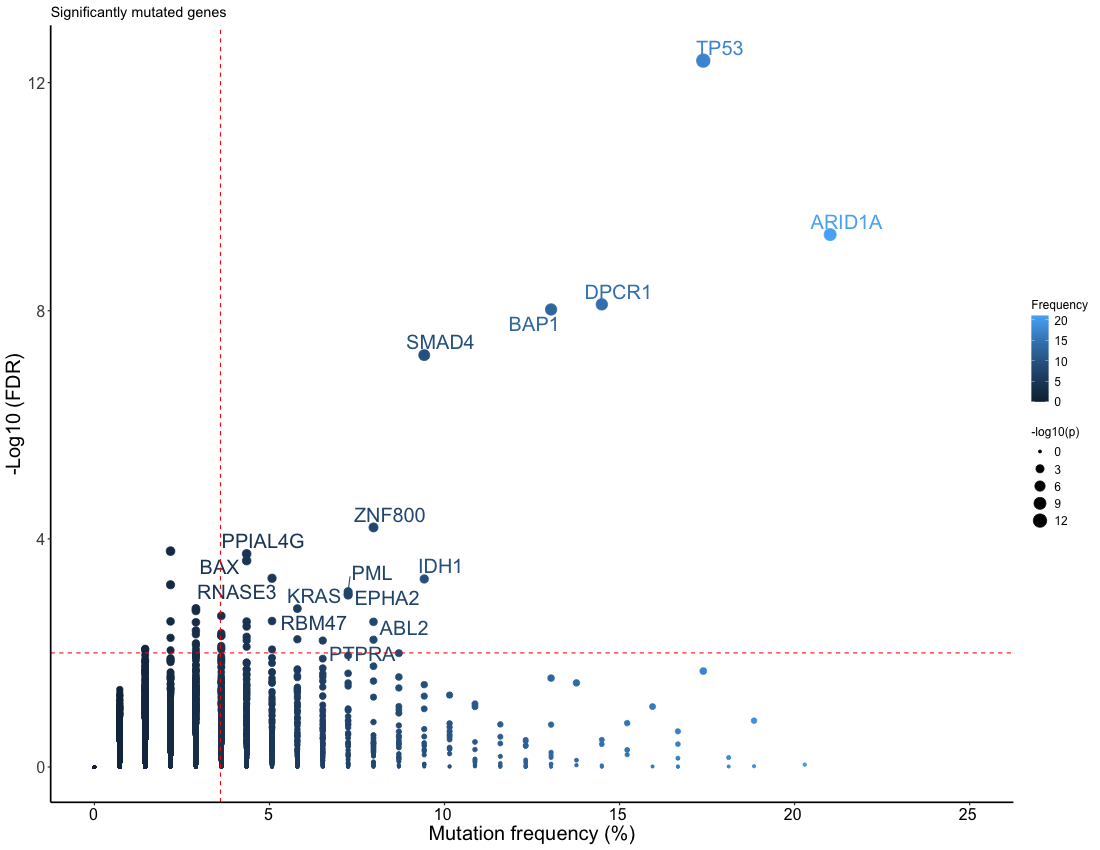

In [11]:
%%R -h 850 -w 1100  # Set width and height

library ("readxl")
require("ggrepel")
require("ggplot2")
library("dplyr")

## ---------------  MutSig2CV SMGs   ---------------
MutSigCV_Mutsig <- read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/Significant_mutation_gene.xlsx", sheet = 2)
colnames(MutSigCV_Mutsig)
MutSigCV_Mutsig = filter(MutSigCV_Mutsig,  n_nonsilent < 30 )
# genes$significant <- ifelse((genes$iCC_sig > 1.301| genes$eCC_sig > 1.301 ), "P_value < 0.05", "Not Sig")
MutSigCV_Mutsig$significant <-ifelse((MutSigCV_Mutsig$p < 0.01 & MutSigCV_Mutsig$n_nonsilent > 5 ), 'SMGs','Non_SMGs')
MutSigCV_Mutsig$Frequency = MutSigCV_Mutsig$n_nonsilent /138*100
MutSigCV_Mutsig$Mutation_count = MutSigCV_Mutsig$n_nonsilent
p = ggplot(MutSigCV_Mutsig, aes(x = Frequency, y = -log10(p), color = Frequency)) +
    geom_point(aes(color = Frequency,size = -log10(p))) +
    # scale_colour_gradient(low = "blue", high = "yellow") +
    scale_fill_gradient(low = "blue", high = "yellow") +
    # scale_color_manual(values = c("grey",'red',"royalblue", 'blue')) +
    theme_bw(base_size = 12) + theme(legend.position = "right") +
    geom_text_repel( 
      data = subset(MutSigCV_Mutsig, MutSigCV_Mutsig$p < 0.01 & MutSigCV_Mutsig$n_nonsilent >= 5  ),
      aes(label = gene),
      size = 7,
      box.padding = unit(0.35, "lines"),
      point.padding = unit(0.3, "lines")) + 
    geom_hline(yintercept = 2,color = 'red', linetype="dashed")+
    geom_vline(xintercept = 3.6,color = 'red', linetype="dashed")+
    xlim(0,25) #+
    # ylim(0,2.5) +
    # scale_y_continuous(limits = c(0, 3.5))
    # scale_x_continuous(breaks=seq(0, 30, 5))

p +
    ## Set title, labels
    # ggtitle("Significantly mutated genes")+
    labs(title="Significantly mutated genes", x="Mutation frequency (%)", y = "-Log10 (FDR)")+
    theme(panel.border = element_blank(), panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
    theme(axis.text.x=element_text(angle=0,hjust = 0.6,colour="black",family="Arial",size=16), 
          axis.title.x=element_text(angle=0,hjust = 0.5,colour="black",family="Arial",size=20),
          axis.text.y=element_text(family="Arial",size=16,face="plain"),
          axis.title.y=element_text(family="Arial",size = 20,face="plain"), 
          panel.border = element_blank(),axis.line = element_line(colour = "black",size=0.8), 
          legend.text=element_text(face="plain", family="Arial", colour="black", size=12),
          legend.title=element_text(face="plain", family="Arial", colour="black", size=12),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank())

## oncodriveCLUST SMGs
- The recurrently mutated genes (≥5 affected cases) and q values <0.1
- The recurrently mutated genes (≥5 affected cases) and p values <0.001

### The recurrently mutated genes (≥5 affected cases) and q values <0.1

R[write to console]: New names:
* `` -> ...1



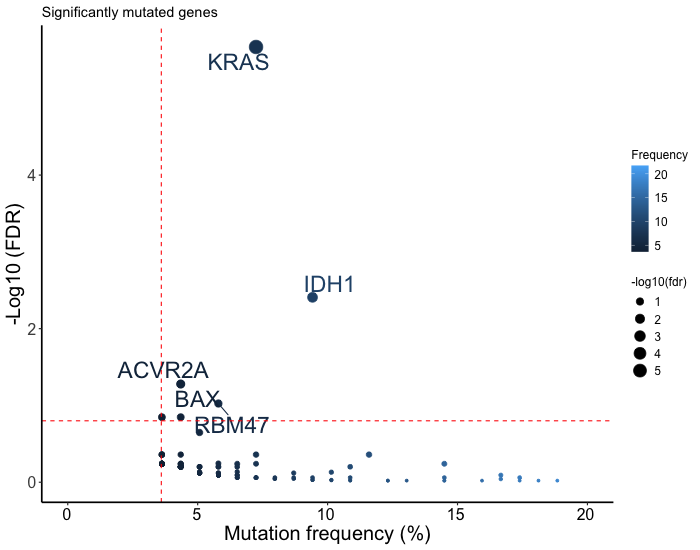

In [26]:
%%R -h 550 -w 700  # Set width and height

library ("readxl")
require("ggrepel")
require("ggplot2")
library("dplyr")

## ---------------  oncodriveCLUST SMGs   ---------------
oncodriveCLUST_Mutsig <- read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/Significant_ mutation_gene.xlsx", sheet = 1)
colnames(oncodriveCLUST_Mutsig)
oncodriveCLUST_Mutsig = as.data.frame(oncodriveCLUST_Mutsig)
# oncodriveCLUST_Mutsig = filter(oncodriveCLUST_Mutsig,  n_nonsilent < 30 )
oncodriveCLUST_Mutsig$significant <-ifelse((oncodriveCLUST_Mutsig$fdr < 0.1 & oncodriveCLUST_Mutsig$total > 5 ), 'SMGs','Non_SMGs')
oncodriveCLUST_Mutsig$Frequency = oncodriveCLUST_Mutsig$total /138*100
oncodriveCLUST_Mutsig$Mutation_count = oncodriveCLUST_Mutsig$total
oncodriveCLUST_Mutsig$fdr = as.numeric(oncodriveCLUST_Mutsig$fdr)
p = ggplot(oncodriveCLUST_Mutsig, aes(x = Frequency, y = -log10(fdr), color = Frequency)) +
  geom_point(aes(color = Frequency,size = -log10(fdr))) +
  # scale_colour_gradient(low = "white", high = "red") +
  scale_fill_gradientn(colours = terrain.colors(7)) +
  # scale_color_manual(values = c("grey",'red',"royalblue", 'blue')) +
  theme_bw(base_size = 12) + theme(legend.position = "right") +
  geom_text_repel( 
    data = subset(oncodriveCLUST_Mutsig, oncodriveCLUST_Mutsig$fdr < 0.1 & oncodriveCLUST_Mutsig$total >= 5  ),
    aes(label = Hugo_Symbol),
    size = 8,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines")) + 
  geom_hline(yintercept = 0.8,color = 'red', linetype="dashed")+
  geom_vline(xintercept = 3.6,color = 'red', linetype="dashed")+
  xlim(0,20) #+
# ylim(0,2.5) +
# scale_y_continuous(limits = c(0, 3.5))
# scale_x_continuous(breaks=seq(0, 30, 5))

p +
  ## Set title, labels
  # ggtitle("Significantly mutated genes")+
  labs(title="Significantly mutated genes", x="Mutation frequency (%)", y = "-Log10 (FDR)")+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
  theme(axis.text.x=element_text(angle=0,hjust = 0.6,colour="black",family="Arial",size=16), 
        axis.title.x=element_text(angle=0,hjust = 0.5,colour="black",family="Arial",size=20),
        axis.text.y=element_text(family="Arial",size=16,face="plain"),
        axis.title.y=element_text(family="Arial",size = 20,face="plain"), 
        panel.border = element_blank(),axis.line = element_line(colour = "black",size=0.8), 
        legend.text=element_text(face="plain", family="Arial", colour="black", size=12),
        legend.title=element_text(face="plain", family="Arial", colour="black", size=12),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())

### The recurrently mutated genes (≥5 affected cases) and q values <0.05

R[write to console]: New names:
* `` -> ...1



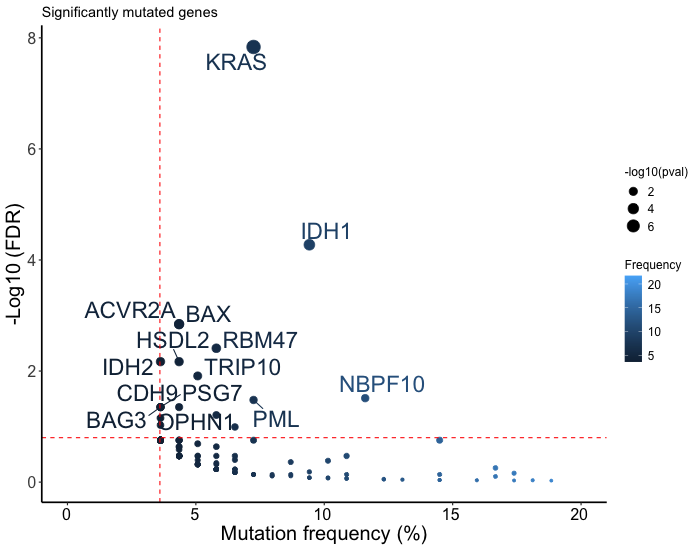

In [28]:
%%R -h 550 -w 700  # Set width and height

library ("readxl")
require("ggrepel")
require("ggplot2")
library("dplyr")

## ---------------  oncodriveCLUST SMGs   ---------------
oncodriveCLUST_Mutsig <- read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/Significant_ mutation_gene.xlsx", sheet = 1)
colnames(oncodriveCLUST_Mutsig)
oncodriveCLUST_Mutsig = as.data.frame(oncodriveCLUST_Mutsig)
# oncodriveCLUST_Mutsig = filter(oncodriveCLUST_Mutsig,  n_nonsilent < 30 )
oncodriveCLUST_Mutsig$significant <-ifelse((oncodriveCLUST_Mutsig$pval < 0.1 & oncodriveCLUST_Mutsig$total > 5 ), 'SMGs','Non_SMGs')
oncodriveCLUST_Mutsig$Frequency = oncodriveCLUST_Mutsig$total /138*100
oncodriveCLUST_Mutsig$Mutation_count = oncodriveCLUST_Mutsig$total
oncodriveCLUST_Mutsig$pval = as.numeric(oncodriveCLUST_Mutsig$pval)
p = ggplot(oncodriveCLUST_Mutsig, aes(x = Frequency, y = -log10(pval), color = Frequency)) +
  geom_point(aes(color = Frequency,size = -log10(pval))) +
  # scale_colour_gradient(low = "white", high = "red") +
  scale_fill_gradientn(colours = terrain.colors(7)) +
  # scale_color_manual(values = c("grey",'red',"royalblue", 'blue')) +
  theme_bw(base_size = 12) + theme(legend.position = "right") +
  geom_text_repel( 
    data = subset(oncodriveCLUST_Mutsig, oncodriveCLUST_Mutsig$pval < 0.05 & oncodriveCLUST_Mutsig$total >= 5  ),
    aes(label = Hugo_Symbol),
    size = 8,
    box.padding = unit(0.35, "lines"),
    point.padding = unit(0.3, "lines")) + 
  geom_hline(yintercept = 0.8,color = 'red', linetype="dashed")+
  geom_vline(xintercept = 3.6,color = 'red', linetype="dashed")+
  xlim(0,20) #+
# ylim(0,2.5) +
# scale_y_continuous(limits = c(0, 3.5))
# scale_x_continuous(breaks=seq(0, 30, 5))

p +
  ## Set title, labels
  # ggtitle("Significantly mutated genes")+
  labs(title="Significantly mutated genes", x="Mutation frequency (%)", y = "-Log10 (FDR)")+
  theme(panel.border = element_blank(), panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"))+
  theme(axis.text.x=element_text(angle=0,hjust = 0.6,colour="black",family="Arial",size=16), 
        axis.title.x=element_text(angle=0,hjust = 0.5,colour="black",family="Arial",size=20),
        axis.text.y=element_text(family="Arial",size=16,face="plain"),
        axis.title.y=element_text(family="Arial",size = 20,face="plain"), 
        panel.border = element_blank(),axis.line = element_line(colour = "black",size=0.8), 
        legend.text=element_text(face="plain", family="Arial", colour="black", size=12),
        legend.title=element_text(face="plain", family="Arial", colour="black", size=12),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())

## correlation analysis of cohorts' frequency mutations

In [17]:
cohort_mutation_matrix = pd.read_excel("/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/data/Fig1/Cohort_Frequency_mutations.xlsx",index_col=0)
cohort_mutation_matrix

TCGA(CCA_US_Can_2017)  MSKCC_cohort(CCA_US_198_2018)  \
Data source                                                         
CDKN2A/2B                  0.06250                       0.078014   
FGFR2                      0.09375                       0.099291   
NF1                        0.03125                       0.000000   
PBRM1                      0.25000                       0.134752   
KRAS                       0.03125                       0.127660   
ATM                        0.03125                       0.080000   
SMAD4                      0.00000                       0.070922   
IDH1/2                     0.18750                       0.255319   
APC                        0.03125                       0.000000   
BAP1                       0.28125                       0.177305   
TP53                       0.09375                       0.205674   
SYNE1                      0.00000                       0.000000   
ARID1A                     0.18750                       0.226950   

             ICGC(BTC_Japan_260_2015)  \
Data source                             
CDKN2A/2B                       0.021   
FGFR2                           0.013   
NF1                             0.046   
PBRM1                           0.054   
KRAS                            0.167   
ATM                             0.042   
SMAD4                           0.084   
IDH1/2                          0.046   
APC                             0.046   
BAP1                            0.075   
TP53                            0.259   
SYNE1                           0.105   
ARID1A                          0.113   

             Jusakul et al.(CCA_10countries_489_2017)  \
Data source                                             
CDKN2A/2B                                    0.028322   
FGFR2                                        0.028322   
NF1                                          0.026144   
PBRM1                                        0.065359   
KRAS                                         0.163399   
ATM                                          0.050109   
SMAD4                                        0.167131   
IDH1/2                                       0.047930   
APC                                          0.071895   
BAP1                                         0.084967   
TP53                                         0.320261   
SYNE1                                        0.100218   
ARID1A                                       0.174292   

             Xiang-Yu et al.(iCCA_China_225_2022)  \
Data source                                         
CDKN2A/2B                                  0.0606   
FGFR2                                      0.0738   
NF1                                        0.0278   
PBRM1                                      0.0833   
KRAS                                       0.1727   
ATM                                        0.0339   
SMAD4                                      0.0573   
IDH1/2                                     0.1478   
APC                                        0.0195   
BAP1                                       0.1168   
TP53                                       0.2199   
SYNE1                                      0.0000   
ARID1A                                     0.1304   

             Fudan_cohort(CCA_China_217_2022)  \
Data source                                     
CDKN2A/2B                            0.028777   
FGFR2                                0.043165   
NF1                                  0.064748   
PBRM1                                0.064748   
KRAS                                 0.071942   
ATM                                  0.079137   
SMAD4                                0.086331   
IDH1/2                               0.115108   
APC                                  0.086331   
BAP1                                 0.122302   
TP53                                 0.158273   
SYNE1                                0.065468   
ARID1A                 

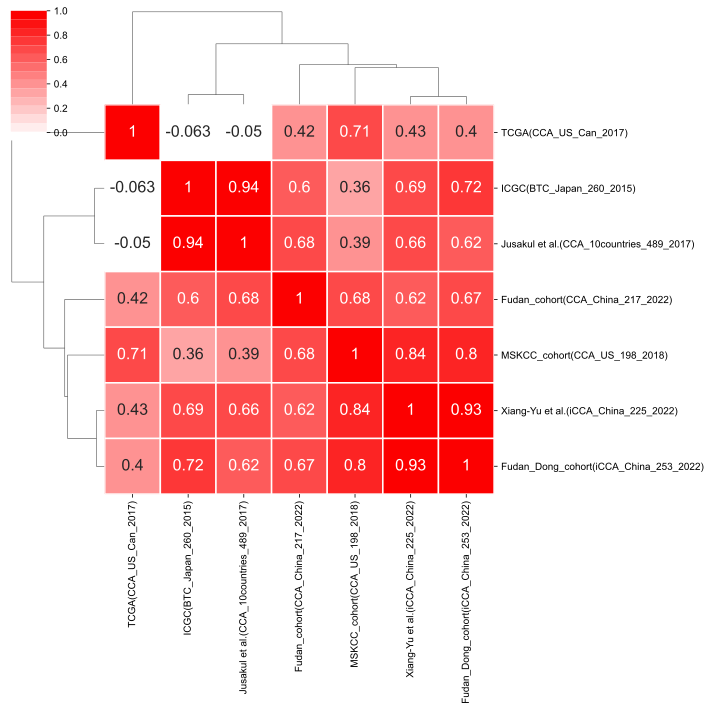

TCGA(CCA_US_Can_2017)  \
TCGA(CCA_US_Can_2017)                                  1.000000   
MSKCC_cohort(CCA_US_198_2018)                          0.707827   
ICGC(BTC_Japan_260_2015)                              -0.063179   
Jusakul et al.(CCA_10countries_489_2017)              -0.049530   
Xiang-Yu et al.(iCCA_China_225_2022)                   0.427250   
Fudan_cohort(CCA_China_217_2022)                       0.418849   
Fudan_Dong_cohort(iCCA_China_253_2022)                 0.402565   

                                          MSKCC_cohort(CCA_US_198_2018)  \
TCGA(CCA_US_Can_2017)                                          0.707827   
MSKCC_cohort(CCA_US_198_2018)                                  1.000000   
ICGC(BTC_Japan_260_2015)                                       0.355339   
Jusakul et al.(CCA_10countries_489_2017)                       0.394845   
Xiang-Yu et al.(iCCA_China_225_2022)                           0.843495   
Fudan_cohort(CCA_China_217_2022)                               0.683723   
Fudan_Dong_cohort(iCCA_China_253_2022)                         0.799958   

                                          ICGC(BTC_Japan_260_2015)  \
TCGA(CCA_US_Can_2017)                                    -0.063179   
MSKCC_cohort(CCA_US_198_2018)                             0.355339   
ICGC(BTC_Japan_260_2015)                                  1.000000   
Jusakul et al.(CCA_10countries_489_2017)                  0.944585   
Xiang-Yu et al.(iCCA_China_225_2022)                      0.694969   
Fudan_cohort(CCA_China_217_2022)                          0.599535   
Fudan_Dong_cohort(iCCA_China_253_2022)                    0.722350   

                                          Jusakul et al.(CCA_10countries_489_2017)  \
TCGA(CCA_US_Can_2017)                                                    -0.049530   
MSKCC_cohort(CCA_US_198_2018)                                             0.394845   
ICGC(BTC_Japan_260_2015)                                                  0.944585   
Jusakul et al.(CCA_10countries_489_2017)                                  1.000000   
Xiang-Yu et al.(iCCA_China_225_2022)                                      0.663790   
Fudan_cohort(CCA_China_217_2022)                                          0.679980   
Fudan_Dong_cohort(iCCA_China_253_2022)                                    0.624711   

                                          Xiang-Yu et al.(iCCA_China_225_2022)  \
TCGA(CCA_US_Can_2017)                                                 0.427250   
MSKCC_cohort(CCA_US_198_2018)                                         0.843495   
ICGC(BTC_Japan_260_2015)                                              0.694969   
Jusakul et al.(CCA_10countries_489_2017)                              0.663790   
Xiang-Yu et al.(iCCA_China_225_2022)                                  1.000000   
Fudan_cohort(CCA_China_217_2022)                                      0.615864   
Fudan_Dong_cohort(iCCA_China_253_2022)                                0.931905   

                                          Fudan_cohort(CCA_China_217_2022)  \
TCGA(CCA_US_Can_2017)                                             0.418849   
MSKCC_cohort(CCA_US_198_2018)                                     0.683723   
ICGC(BTC_Japan_260_2015)                                          0.599535   
Jusakul et al.(CCA_10countries_489_2017)                          0.679980   
Xiang-Yu et al.(iCCA_China_225_2022)                              0.615864   
Fudan_cohort(CCA_China_217_2022)                                  1.000000   
Fudan_Dong_cohort(iCCA_China_253_2022)                            0.673290   

                                          Fudan_Dong_cohort(iCCA_China_253_2022)  
TCGA(CCA_US_Can_2017)                                                   0.402565  
MSKCC_cohort(CCA_US_198_2018)                                           0.799958  
ICGC(BTC_Japan_260_2015)                                                0.722350  
Jusakul et al.(CCA_10countries_489_2017)

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# define the colormap ['#1c3e9f', 'white', '#fc0000']EE1D24 2369AD fc0000
cmap = mcolors.LinearSegmentedColormap.from_list(
    "red_blue_gradient", ['white', '#fc0000'], N=15)

def correlation_heatmap(data, method = 'pearson', log_transformed = False, outpath = None):
    """ Correaltion heatmap and correlation matrix 
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    method -> str: pearson or spearman
    log_transformed -> bool: whether to use log10 transformed data
    
    Return:
    -----------
    Dataframe: Correaltion of experiments data
    
    """
    if log_transformed:
        data = np.log10(data)
    corr = data.corr(method = method)
    ## Platelet selection refernce: https://learnku.com/articles/39890
    sn.clustermap(corr, annot= True, cmap=cmap,linewidths=1.5, color='black',annot_kws={"size": 16})  ## optional cmap: RdYlGn; RdYlGn_r; YlGn; rocket_r; YlGnBu; YlGnBu_r; YlOrBr; YlOrBr_r; YlOrRd; YlOrRd_r; RdBu_r
    # sn.heatmap(corr, annot=True, cmap='vlag')  ## optional cmap: RdYlGn; RdYlGn_r; YlGn; rocket_r; YlGnBu; YlGnBu_r; YlOrBr; YlOrBr_r; YlOrRd; YlOrRd_r;
    if outpath:
        plt.savefig(outpath + "/correlation_heatmap4.pdf")
        corr.to_csv(outpath + "/correlation_matrix.csv")
    plt.show()
    return corr


# corr = QC1.corr(method ='pearson')
# sn.heatmap(corr, cmap="rocket_r", annot=True)
# QC_data_293T = pd.read_csv("/Users/ranpeng/Desktop/Desktop/项目文件/对外服务/罗俊一/results/QC_data.csv", index_col = 0)
outpath = "/Users/ranpeng/Desktop/Integrated_multiomics_analysis_CCA/figure_subpanels/Fig1"
correlation_heatmap(cohort_mutation_matrix, method = 'pearson', outpath = outpath)

## mutation signature Clinical relevance

In [10]:
mutation_signature = pd.read_csv("/Volumes/Samsung_T5/downloads/Integrated_multiomics_analysis_CCA/data/Fig1/clinical_merge20220406.csv", index_col = 0)
mutation_signature.dropna(subset = ['gene_T'], inplace = True)
mutation_signature

clinical       time  time_day  status T_pathological_subtype  \
CCA_No                                                                  
CCA#32   14S25615  49.033333    1471.0     0.0         5-1+5-2+L+N(S)   
CCA#33   14S26078  32.466667     974.0     1.0              5-1(N)(S)   
CCA#34   14S26209  47.500000    1425.0     0.0                 5-1(S)   
CCA#36   14S27582  23.466667     704.0     1.0               5-2+L(S)   
CCA#37   14S28082  62.500000    1875.0     0.0                 5-1(S)   
...           ...        ...       ...     ...                    ...   
CCA#206  18S11211  18.733333     562.0     1.0                 5-1-AC   
CCA#207  18S11765   9.600000     288.0     1.0                5-1-5-4   
CCA#210  18S32905  12.933333     388.0     1.0                 5-1-AC   
CCA#215  18S42281  10.033333     301.0     1.0                 5-1-AC   
CCA#216  18S53535   1.066667      32.0     1.0                 5-1-AC   

        NAT_pathological_subtype iCCA_Pathology  age  gender              E/I  \
CCA_No                                                                          
CCA#32                       111        smallBD   66  FEMALE     intrahepatic   
CCA#33                       210        smallBD   33    MALE     intrahepatic   
CCA#34                     0-0-1        smallBD   54  FEMALE     intrahepatic   
CCA#36                       141        smallBD   37    MALE     intrahepatic   
CCA#37                       100        smallBD   66  FEMALE     intrahepatic   
...                          ...            ...  ...     ...              ...   
CCA#206                      0-0            NaN   74    MALE  hilar/perihilar   
CCA#207                      0-0            NaN   58    MALE  hilar/perihilar   
CCA#210                  0-0-4-a            NaN   61  FEMALE  hilar/perihilar   
CCA#215                      0-0            NaN   62  FEMALE  hilar/perihilar   
CCA#216                      0-0            NaN   69    MALE  hilar/perihilar   

         ...  PML  TET2  NF1        ARID2  MSH6        PBRM1 RBM47  \
CCA_No   ...                                                         
CCA#32   ...  NaN   NaN  NaN  Splice_Site   NaN          NaN   NaN   
CCA#33   ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
CCA#34   ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
CCA#36   ...  NaN   NaN  NaN          NaN   NaN  Splice_Site   NaN   
CCA#37   ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
...      ...  ...   ...  ...          ...   ...          ...   ...   
CCA#206  ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
CCA#207  ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
CCA#210  ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
CCA#215  ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   
CCA#216  ...  NaN   NaN  NaN          NaN   NaN          NaN   NaN   

                FGFR2 IDH2  FGFR2_fusion  
CCA_No                                    
CCA#32            NaN  NaN           NaN  
CCA#33   FGFR2_fusion  NaN  FGFR2-fusion  
CCA#34            NaN  NaN           NaN  
CCA#36            NaN  NaN           NaN  
CCA#37            NaN  NaN           NaN  
...               ...  ...           ...  
CCA#206           NaN  NaN           NaN  
CCA#207           NaN  NaN           NaN  
CCA#210           NaN  NaN           NaN  
CCA#215           NaN  NaN           NaN  
CCA#216           NaN  NaN           NaN  

[139 rows x 97 columns]

In [9]:
mutation_signature.columns

Index(['clinical', 'time', 'time_day', 'status', 'T_pathological_subtype',
       'NAT_pathological_subtype', 'iCCA_Pathology', 'age', 'gender', 'E/I',
       'iCC_eCC', 'firT', 'gene_T', 'phos_T', 'phos_T_firmiana', 'firN',
       'gene_N', 'phos_N', 'RNA_T', 'RNA_N', 'phos_N_firmiana', 'PT', 'HBsAg',
       'HBcAb', 'HBV', 'GGT', 'ALT', 'Tbil', 'CA199', 'Cholelithiasis_1',
       'Type_2_diabetes', 'Hypertension', 'Presence_of_fluke_infection',
       'Perineural_invasion', 'Lymphovascular_invasion', 'G', 'S', 'F', 'T',
       'N', 'M', 'Stage', 'eccStage', 'iccStage', 'Grade', 'Age', 'Gender',
       'Pathology', 'Proteome_Subtype', 'Tumor_Sample_Barcode', 'total_perMB',
       'log2_TMB', 'Sig1', 'Sig2', 'Sig3', 'Sig4', '6p22.2 _Amp', '6q14.3_Del',
       '1q21.2_Amp', '6p21.2_Del', 'fir_T1', 'StromalScore', 'ImmuneScore',
       'ESTIMATEScore', 'TumorPurity', 'ImmuneScore_Xcell',
       'StromaScore_Xcell', 'MicroenvironmentScore_Xcell', 'Gene_ID',
       'Immune_CCP_Class', 'sam

In [11]:
mutation_signature_val = mutation_signature[['time_day','age','iCC_eCC','Sig1', 'Sig2', 'Sig3', 'Sig4','total_perMB','log2_TMB','StromalScore', 'ImmuneScore','ESTIMATEScore', 'TumorPurity', 
                                            'ImmuneScore_Xcell','StromaScore_Xcell', 'MicroenvironmentScore_Xcell']]
mutation_signature_val                                           

time_day  age  iCC_eCC          Sig1       Sig2        Sig3  \
CCA_No                                                                 
CCA#32     1471.0   66        1  6.987055e+00  70.728979  131.060184   
CCA#33      974.0   33        1  1.213429e+01   8.371214   13.001320   
CCA#34     1425.0   54        1  1.578806e+01   7.475397   47.963349   
CCA#36      704.0   37        1  2.120000e-11  35.536571   44.287279   
CCA#37     1875.0   66        1  7.229197e+01  12.438921  100.385620   
...           ...  ...      ...           ...        ...         ...   
CCA#206     562.0   74        2  2.265746e+01   1.894928   36.950766   
CCA#207     288.0   58        2  1.659242e+01  30.914591   62.507465   
CCA#210     388.0   61        2  8.395230e+00  22.076604   80.033417   
CCA#215     301.0   62        2  1.333958e+01   3.028619   33.170623   
CCA#216      32.0   69        2  1.998058e+01   6.943456   54.075964   

                 Sig4  total_perMB  log2_TMB  StromalScore  ImmuneScore  \
CCA_No                                                                    
CCA#32   9.422373e+01         2.16  1.111031    -91.417759   450.225684   
CCA#33   4.931816e-01         0.30 -1.736966    -60.882196  1079.979044   
CCA#34   2.773191e+00         0.38 -1.395929    111.780348    52.696331   
CCA#36   2.791759e+02         3.04  1.604071   -169.271856  1098.259305   
CCA#37   1.488346e+01         1.24  0.310340   -408.148426   194.079007   
...               ...          ...       ...           ...          ...   
CCA#206  3.496831e+00         0.92 -0.120294    531.687983   634.834842   
CCA#207  1.298553e+01         0.64 -0.643856    704.560335   350.646205   
CCA#210  2.249474e+01         0.70 -0.514573    591.907171   630.912757   
CCA#215  4.461174e+00         0.54 -0.888969    795.307378   666.203577   
CCA#216  8.450000e-12         0.74 -0.434403    594.816061   471.885162   

         ESTIMATEScore  TumorPurity  ImmuneScore_Xcell  StromaScore_Xcell  \
CCA_No                                                                      
CCA#32      358.807925     0.791427             0.0242             0.0034   
CCA#33     1019.096848     0.728560             0.0000             0.0000   
CCA#34      164.476679     0.808539             0.0065             0.0125   
CCA#36      928.987449     0.737556             0.0036             0.0068   
CCA#37     -214.069419     0.839972             0.0069             0.0137   
...                ...          ...                ...                ...   
CCA#206    1166.522825     0.713567             0.0053             0.0498   
CCA#207    1055.206540     0.724919             0.0151             0.0590   
CCA#210    1222.819928     0.707754             0.0037             0.0596   
CCA#215    1461.510955     0.682572             0.0114             0.0437   
CCA#216    1066.701222     0.723756             0.0151             0.0767   

         MicroenvironmentScore_Xcell  
CCA_No                                
CCA#32                        0.0276  
CCA#33                        0.0000  
CCA#34                        0.0189  
CCA#36                        0.0105  
CCA#37                        0.0206  
...                              ...  
CCA#206                       0.0551  
CCA#207                       0.0741  
CCA#210                       0.0633  
CCA#215                       0.0551  
CCA#216                       0.0918  

[139 rows x 16 columns]

In [12]:
gene_mutation = mutation_signature[[
    'ARID1A', 'TP53', 'KMT2C','DPCR1', 'BAP1', 'MGA', 'KMT2A', 'KMT2D', 'APC', 
    'IDH1', 'SMAD4', 'ATM','NCOR1', 'EPHA2', 'KRAS', 'PML', 'TET2', 'NF1', 'ARID2', 
    'MSH6','PBRM1', 'RBM47', 'FGFR2', 'IDH2','FGFR2_fusion','6p22.2 _Amp', '6q14.3_Del', '1q21.2_Amp', '6p21.2_Del'
]]

gene_mutation

ARID1A               TP53 KMT2C DPCR1 BAP1  MGA KMT2A KMT2D  APC IDH1  \
CCA_No                                                                          
CCA#32     NaN  Missense_Mutation   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#33     NaN                NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#34     NaN                NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#36     NaN  Nonsense_Mutation   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#37     NaN                NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
...        ...                ...   ...   ...  ...  ...   ...   ...  ...  ...   
CCA#206    NaN                NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#207    NaN                NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#210    NaN  Missense_Mutation   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#215    NaN  Nonsense_Mutation   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   
CCA#216    NaN       In_Frame_Del   NaN   NaN  NaN  NaN   NaN   NaN  NaN  NaN   

         ... MSH6        PBRM1 RBM47         FGFR2 IDH2  FGFR2_fusion  \
CCA_No   ...                                                            
CCA#32   ...  NaN          NaN   NaN           NaN  NaN           NaN   
CCA#33   ...  NaN          NaN   NaN  FGFR2_fusion  NaN  FGFR2-fusion   
CCA#34   ...  NaN          NaN   NaN           NaN  NaN           NaN   
CCA#36   ...  NaN  Splice_Site   NaN           NaN  NaN           NaN   
CCA#37   ...  NaN          NaN   NaN           NaN  NaN           NaN   
...      ...  ...          ...   ...           ...  ...           ...   
CCA#206  ...  NaN          NaN   NaN           NaN  NaN           NaN   
CCA#207  ...  NaN          NaN   NaN           NaN  NaN           NaN   
CCA#210  ...  NaN          NaN   NaN           NaN  NaN           NaN   
CCA#215  ...  NaN          NaN   NaN           NaN  NaN           NaN   
CCA#216  ...  NaN          NaN   NaN           NaN  NaN           NaN   

        6p22.2 _Amp 6q14.3_Del 1q21.2_Amp 6p21.2_Del  
CCA_No                                                
CCA#32          2.0        0.0        2.0        0.0  
CCA#33          0.0        0.0        0.0        0.0  
CCA#34          0.0        0.0        0.0        0.0  
CCA#36          0.0        0.0        0.0        0.0  
CCA#37          2.0        1.0        0.0        0.0  
...             ...        ...        ...        ...  
CCA#206         0.0        0.0        0.0        0.0  
CCA#207         0.0        0.0        0.0        0.0  
CCA#210         0.0        0.0        0.0        1.0  
CCA#215         0.0        0.0        0.0        0.0  
CCA#216         0.0        0.0        0.0        0.0  

[139 rows x 29 columns]

In [13]:
# Replace all non NA values with 1 in the gene mutation matrix
def convert_mutation_matrix(mutation_matrix, ignore_cols=None):
    """ Convert mutation matrix to binary matrix
    Args:
    --------------
    mutation_matrix -> Dataframe: dataframe of raw data
    ignore_cols -> list: list of columns to ignore
    
    Return:
    -----------
    Dataframe: binary mutation matrix
    
    """
    if ignore_cols:
        mutation_matrix_sub= mutation_matrix.drop(ignore_cols, axis=1)
        mutation_matrix_binary = mutation_matrix_sub.notnull().mul(1)
        mutation_matrix_binary = mutation_matrix_binary.join(mutation_matrix[ignore_cols])
    else:
        mutation_matrix_binary = mutation_matrix.notnull().mul(1)
    return mutation_matrix_binary

mutation_matrix_binary = convert_mutation_matrix(gene_mutation, ignore_cols=['6p22.2 _Amp', '6q14.3_Del', '1q21.2_Amp', '6p21.2_Del'])

In [14]:
# Transform a column greater than 0.3 to Amp, less than -0.3 to Del and the rest to WT
def convert_CNVs_matrix_binary(CNVs_matrix, ignore_cols=None):
    """ Convert mutation matrix to binary matrix
    Args:
    --------------
    mutation_matrix_binary -> Dataframe: dataframe of raw data
    ignore_cols -> list: list of columns to ignore
    
    Return:
    -----------
    Dataframe: binary mutation matrix
    
    """
    if ignore_cols:
        CNVs_matrix_sub = CNVs_matrix.drop(ignore_cols, axis=1)
        CNVs_matrix_sub[CNVs_matrix_sub > 0.3] = 2
        CNVs_matrix_sub[CNVs_matrix_sub <= -0.3] = -2
        CNVs_matrix_sub[(CNVs_matrix_sub > -0.3) & (CNVs_matrix_sub < 0.3)] = 0
        CNVs_matrix_binary = CNVs_matrix_sub.join(CNVs_matrix[ignore_cols])

    else:
        CNVs_matrix_binary = CNVs_matrix.copy()
        CNVs_matrix_binary[CNVs_matrix_binary > 0.3] = 2
        CNVs_matrix_binary[CNVs_matrix_binary <= -0.3] = -2
        CNVs_matrix_binary[(CNVs_matrix_binary > -0.3) & (CNVs_matrix_binary < 0.3)] = 0
    return CNVs_matrix_binary


mutation_matrix = convert_CNVs_matrix_binary(mutation_matrix_binary, ignore_cols=[
    'ARID1A', 'TP53', 'KMT2C', 'DPCR1', 'BAP1', 'MGA', 'KMT2A', 'KMT2D', 'APC',
    'IDH1', 'SMAD4', 'ATM', 'NCOR1', 'EPHA2', 'KRAS', 'PML', 'TET2', 'NF1', 'ARID2',
    'MSH6', 'PBRM1', 'RBM47', 'FGFR2', 'IDH2'])


mutation_binry_dic = {  0:'WT', 
                        1:'Mutation',
                        2:'Mutation', 
                        -2:'Del' }
mutation_matrix = mutation_matrix.replace(mutation_binry_dic)
mutation_matrix


FGFR2_fusion 6p22.2 _Amp 6q14.3_Del 1q21.2_Amp 6p21.2_Del ARID1A  \
CCA_No                                                                     
CCA#32            WT    Mutation         WT   Mutation         WT     WT   
CCA#33      Mutation          WT         WT         WT         WT     WT   
CCA#34            WT          WT         WT         WT         WT     WT   
CCA#36            WT          WT         WT         WT         WT     WT   
CCA#37            WT    Mutation   Mutation         WT         WT     WT   
...              ...         ...        ...        ...        ...    ...   
CCA#206           WT          WT         WT         WT         WT     WT   
CCA#207           WT          WT         WT         WT         WT     WT   
CCA#210           WT          WT         WT         WT   Mutation     WT   
CCA#215           WT          WT         WT         WT         WT     WT   
CCA#216           WT          WT         WT         WT         WT     WT   

             TP53 KMT2C DPCR1 BAP1  ... KRAS PML TET2 NF1     ARID2 MSH6  \
CCA_No                              ...                                    
CCA#32   Mutation    WT    WT   WT  ...   WT  WT   WT  WT  Mutation   WT   
CCA#33         WT    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#34         WT    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#36   Mutation    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#37         WT    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
...           ...   ...   ...  ...  ...  ...  ..  ...  ..       ...  ...   
CCA#206        WT    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#207        WT    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#210  Mutation    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#215  Mutation    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   
CCA#216  Mutation    WT    WT   WT  ...   WT  WT   WT  WT        WT   WT   

            PBRM1 RBM47     FGFR2 IDH2  
CCA_No                                  
CCA#32         WT    WT        WT   WT  
CCA#33         WT    WT  Mutation   WT  
CCA#34         WT    WT        WT   WT  
CCA#36   Mutation    WT        WT   WT  
CCA#37         WT    WT        WT   WT  
...           ...   ...       ...  ...  
CCA#206        WT    WT        WT   WT  
CCA#207        WT    WT        WT   WT  
CCA#210        WT    WT        WT   WT  
CCA#215        WT    WT        WT   WT  
CCA#216        WT    WT        WT   WT  

[139 rows x 29 columns]

In [18]:
mutation_matrix.to_csv("/Volumes/Samsung_T5/downloads/Integrated_multiomics_analysis_CCA/data/response/FGFR2_mutation_matrix.csv")

In [15]:
## Set drawing coordinates and font parameters
import matplotlib.pyplot as plt
parameters = {'axes.labelsize': 15,
             'axes.titlesize': 15,
             'figure.titlesize': 18}
plt.rcParams.update(parameters)

The current path: ./scatter_plots already exist


ValueError: array must not contain infs or NaNs

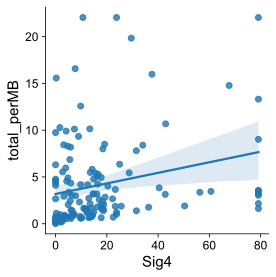

In [18]:
### Correlation Analysis
import seaborn as sns
import scipy as sp
from utils import create_output_dir

data = mutation_signature_val
# tips = sns.load_dataset('tips')

def calculate_corr(data, x, y, corr_method='pearson'):
    """Calculate the correlation matrix for a given two variables.
    """
    if corr_method == 'pearson':
        corr, p_value = sp.stats.pearsonr(data[x], data[y])
    elif corr_method == 'spearman':
        corr, p_value = sp.stats.spearmanr(data[x], data[y])
    else:
        raise ValueError('corr_method should be pearson or spearman')
    return corr_method, corr, p_value


def capping_outlier(data, col, factor):
    """capping outlier of one column
    
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    col -> str: column name
    
    Return:
    ---------------
    Dataframe: dataframe with capped outlier
    """
    data = data.copy()
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    data[col] = data[col].clip(lower_bound, upper_bound)
    return data     


def correlation_scatter_plot(data,
                             corr_method='pearson',
                             x=None,
                             y=None,
                             capping_outlies=False,
                             title=None,
                             x_title=None,
                             y_title=None,
                             FacetGrid_target = None,
                             FacetGrid_target_row = None,
                             filename=None,
                             ax=None,
                             outpath=None):
    """ Correaltion scatter plot 
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    corr_type -> str: pearson or spearman
    
    Return:
    -----------
    Dataframe: Correaltion of experiments data
    
    """
    def pvalue_annotate(data, ax = None, **kws):
        correlation_method, r, p = calculate_corr(data, x, y, corr_method)
        if ax is None:
            ax = plt.gca()
        # ax = ax
        if p < 0.05 and r > 0.6:
            ax.annotate('{} corr={:.2f}, p={:.2g}'.format(correlation_method, r, p),
                        xy=(0.05, 0.85),
                        xycoords=ax.transAxes,
                        size=14,
                        color='red',
                        weight='bold')
        else:
            ax.annotate('{} corr={:.2f}, p={:.2g}'.format(correlation_method, r, p),
                        xy=(0.05, 0.85),
                        xycoords=ax.transAxes,
                        size=14,
                        color='black',
                        weight='regular')
            # ax.text(.05, .85, 'Pearson corr={:.2f}, p={:.2g}'.format(r, p), transform=ax.transAxes)

    if capping_outlier:
        data = data.copy()
        data = capping_outlier(data, x, factor=4)
        data = capping_outlier(data, y, factor=4)

    if FacetGrid_target:
        if FacetGrid_target_row:
            g = sns.FacetGrid(data, col=FacetGrid_target, row=FacetGrid_target_row, size=4, aspect=1)
        else:
            g = sns.FacetGrid(data, col=FacetGrid_target, size=4, aspect=1)
        g.map_dataframe(sns.regplot, x=x, y=y)
        g.map_dataframe(pvalue_annotate)
        g.set_axis_labels(x, y)
        # g.set_axis_labels("Total bill ($)", "Tip ($)")

    else:
        if ax:
            g = sns.regplot(data=data, x=x, y=y, ax = ax) # fit_reg=True, scatter_kws={"s": 20})
        else:
            g = sns.lmplot(data=data, x=x, y=y, height=4, aspect=1)
        ## add corr and p-value information
        pvalue_annotate(data,g)
        ## add x and y labels
        if title:
            ax.set_title(title)
        if y_title:
            ax.set_ylabel(y_title)
        if x_title:
            ax.set_xlabel(x_title)
        # return ax

    if outpath:
        # g.tight_layout()
        plt.savefig(f"{outpath}/{filename}.pdf")

# g.map_dataframe(annotate)
# plt.show()
# data = data.fillna(0)
scatter_outpath = create_output_dir('scatter_plots')
correlation_scatter_plot(data=data, corr_method = 'pearson',capping_outlies = False, x = 'Sig4', y = 'total_perMB', filename = 'correlation_plot1', outpath=scatter_outpath)


In [5]:
data = pd.read_excel("/Volumes/Samsung_T5/downloads/Integrated_multiomics_analysis_CCA/data/response/AA_signature/AA_signature.xlsx")
data

Unnamed: 0   CCA_No      TP53          Sig4  Age  \
0             0   CCA#32  Mutation  9.422373e+01   66   
1             1   CCA#33        WT  4.931816e-01   33   
2             2   CCA#34        WT  2.773191e+00   54   
3             3   CCA#36  Mutation  2.791759e+02   37   
4             4   CCA#37        WT  1.488346e+01   66   
..          ...      ...       ...           ...  ...   
134         134  CCA#206        WT  3.496831e+00   74   
135         135  CCA#207        WT  1.298553e+01   58   
136         136  CCA#210  Mutation  2.249474e+01   61   
137         137  CCA#215  Mutation  4.461174e+00   62   
138         138  CCA#216  Mutation  8.450000e-12   69   

     Overall survival(month)  Overall survival(day)  Tumor size (cm)  \
0                  49.033333                 1471.0              4.0   
1                  32.466667                  974.0              4.0   
2                  47.500000                 1425.0              5.0   
3                  23.466667                  704.0              2.5   
4                  62.500000                 1875.0              2.0   
..                       ...                    ...              ...   
134                18.733333                  562.0              3.0   
135                 9.600000                  288.0              3.0   
136                12.933333                  388.0              4.0   
137                10.033333                  301.0              2.0   
138                 1.066667                   32.0              4.0   

     Preoperative AFP（ng/mL）  Preoperative CA19-9（U/ml）  ...  \
0                       12.1                       32.6  ...   
1                        2.6                       13.3  ...   
2                        3.5                      157.3  ...   
3                        1.5                       10.1  ...   
4                        2.6                      197.0  ...   
..                       ...                        ...  ...   
134                      7.5                      122.2  ...   
135                      3.5                      643.5  ...   
136                      3.5                      747.9  ...   
137                      9.8                     1140.0  ...   
138                      NaN                        NaN  ...   

     ALB, albumin, (g/L)  TB, total bilirubin (µmol/L)  \
0                   37.5                           6.4   
1                   40.1                           5.7   
2                   41.1                          10.2   
3                   40.3                          11.9   
4                   43.5                           9.6   
..                   ...                           ...   
134                 36.0                         117.9   
135                 44.0                         266.3   
136                 46.0                          49.3   
137                  NaN                         282.2   
138                  NaN                          22.8   

     ALT, aminoleucine transferase (U/L)  γ-GT, γ-glutamyltransferase (U/L)  \
0                                   13.0                               20.5   
1                                   18.7                               24.6   
2                                   44.4                               45.2   
3                                   69.0                               32.0   
4                                   28.0                               74.1   
..                                   ...                                ...   
134                                776.0                              131.0   
135                                 86.0                                NaN   
136                                 65.0                              323.0   
137                                 52.0                              135.0   
138                                 37.0                                NaN   

     \nAST/GOT,Aspartate aminotransferas

In [25]:
data.replace(np.nan, 0, inplace=True)

/Applications/Anaconda_3/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [22]:
data

time_day  age  iCC_eCC          Sig1       Sig2        Sig3  \
CCA_No                                                                 
CCA#32     1471.0   66        1  6.987055e+00  70.728979  131.060184   
CCA#33      974.0   33        1  1.213429e+01   8.371214   13.001320   
CCA#34     1425.0   54        1  1.578806e+01   7.475397   47.963349   
CCA#36      704.0   37        1  2.120000e-11  35.536571   44.287279   
CCA#37     1875.0   66        1  7.229197e+01  12.438921  100.385620   
...           ...  ...      ...           ...        ...         ...   
CCA#206     562.0   74        2  2.265746e+01   1.894928   36.950766   
CCA#207     288.0   58        2  1.659242e+01  30.914591   62.507465   
CCA#210     388.0   61        2  8.395230e+00  22.076604   80.033417   
CCA#215     301.0   62        2  1.333958e+01   3.028619   33.170623   
CCA#216      32.0   69        2  1.998058e+01   6.943456   54.075964   

                 Sig4  total_perMB  log2_TMB  StromalScore  ImmuneScore  \
CCA_No                                                                    
CCA#32   9.422373e+01         2.16  1.111031    -91.417759   450.225684   
CCA#33   4.931816e-01         0.30 -1.736966    -60.882196  1079.979044   
CCA#34   2.773191e+00         0.38 -1.395929    111.780348    52.696331   
CCA#36   2.791759e+02         3.04  1.604071   -169.271856  1098.259305   
CCA#37   1.488346e+01         1.24  0.310340   -408.148426   194.079007   
...               ...          ...       ...           ...          ...   
CCA#206  3.496831e+00         0.92 -0.120294    531.687983   634.834842   
CCA#207  1.298553e+01         0.64 -0.643856    704.560335   350.646205   
CCA#210  2.249474e+01         0.70 -0.514573    591.907171   630.912757   
CCA#215  4.461174e+00         0.54 -0.888969    795.307378   666.203577   
CCA#216  8.450000e-12         0.74 -0.434403    594.816061   471.885162   

         ESTIMATEScore  TumorPurity  ImmuneScore_Xcell  StromaScore_Xcell  \
CCA_No                                                                      
CCA#32      358.807925     0.791427             0.0242             0.0034   
CCA#33     1019.096848     0.728560             0.0000             0.0000   
CCA#34      164.476679     0.808539             0.0065             0.0125   
CCA#36      928.987449     0.737556             0.0036             0.0068   
CCA#37     -214.069419     0.839972             0.0069             0.0137   
...                ...          ...                ...                ...   
CCA#206    1166.522825     0.713567             0.0053             0.0498   
CCA#207    1055.206540     0.724919             0.0151             0.0590   
CCA#210    1222.819928     0.707754             0.0037             0.0596   
CCA#215    1461.510955     0.682572             0.0114             0.0437   
CCA#216    1066.701222     0.723756             0.0151             0.0767   

         MicroenvironmentScore_Xcell  
CCA_No                                
CCA#32                        0.0276  
CCA#33                        0.0000  
CCA#34                        0.0189  
CCA#36                        0.0105  
CCA#37                        0.0206  
...                              ...  
CCA#206                       0.0551  
CCA#207                       0.0741  
CCA#210                       0.0633  
CCA#215                       0.0551  
CCA#216                       0.0918  

[139 rows x 16 columns]

x_axis       y_axis corr_method      corr       p_value
0   Sig4  total_perMB     pearson  0.174745  3.964149e-02
1   Sig4  ImmuneScore     pearson  0.323620  1.018771e-04
2   Sig1  total_perMB     pearson  0.865198  6.661720e-43
3   Sig1  ImmuneScore     pearson -0.026495  7.568607e-01

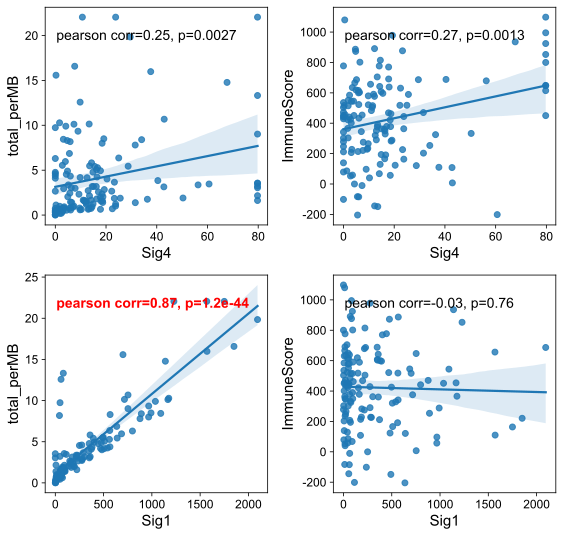

In [26]:
## loop plot corr plot
select_cols = ['Sig4','Sig1']

# select_rows = [
#     'total_perMB', 'StromalScore', 'ImmuneScore', 'ESTIMATEScore',
#     'TumorPurity', 'ImmuneScore_Xcell', 'StromaScore_Xcell',
#     'MicroenvironmentScore_Xcell'
# ]
select_rows = ['total_perMB', 'ImmuneScore']

# creating final the pvalue and correlation value repository
corr_repos_dict = { 'x_axis' : [],
                    'y_axis' : [],
                    'corr_method' : [],
                    'corr' : [],
                    'p_value' : [] }

# adding information in repository
def add_in_paper_repo(x_axis, y_axis, corr_method, corr, p_value):
    corr_repos_dict['x_axis'].append(x_axis)
    corr_repos_dict['y_axis'].append(y_axis)
    corr_repos_dict['corr_method'].append(corr_method)
    corr_repos_dict['corr'].append(corr)
    corr_repos_dict['p_value'].append(p_value)


def facegrid_corr_plot(data, select_cols, select_rows, corr_method, filename = None, outpath=None ):
    """draw a facegrid plot for correlation analysis

    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    select_col -> list: list of x_axis to be selected
    select_row -> list: list of y_axis to be selected
    kwargs -> dict: other parameters

    Return:
    ---------------
    Dataframe: Correaltion of experiments data

    """
    combines = [(i, j) for i in select_cols for j in select_rows]
    ncols, nrows = len(select_cols), len(select_rows)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 4, nrows * 3.8))
    for combine, ax in zip(combines, axes.flatten()):
        # save p-value and corr value
        corr_method, corr, p_value = calculate_corr(data, x = combine[0], y = combine[1], corr_method = corr_method)
        add_in_paper_repo(combine[0], combine[1], corr_method, corr, p_value)
        correlation_scatter_plot(data=data, corr_method = corr_method, x = combine[0], y = combine[1], ax = ax)

    plt.tight_layout()
    if outpath:
        fig.savefig(f"{outpath}/{filename}.pdf")
    return pd.DataFrame(corr_repos_dict)

outpath = r'/Volumes/Samsung_T5/downloads/Integrated_multiomics_analysis_CCA/figure_subpanels/Fig1/'
facegrid_corr_plot(data=data, select_cols = select_cols, select_rows = select_rows, corr_method ='pearson',
                    filename='signature_TMB_cor', outpath=outpath)
## boxplot
# ncols = len(select_col)
# fig, axes = plt.subplots(1,ncols, figsize=(ncols*3,4))
# for col, ax in zip(select_col, axes.flatten()):
#     sns.boxplot(y=col, x= "iCC_eCC", data=data, orient='v', ax=ax)

### results
- 从上图中我们可以看到，Sig4(AA)与stromal和immune score存在明显的相关性，而其他的signature则没有呈现出这种现象存在这种现象。
  - 需要进一步探究是那种细胞类型与sig4的关联，将Sig4与各个细胞亚型做相关性
  - 需要将mutation
- 同时我们可以看到Sig1(Defective DNA base excision repair)与TMB之间呈现出最强的相关性，sig2、sig3、sig4之间的相关性也表明了他们对肿瘤TMB水平的具有不同程度的贡献。

### mutation signature and gene mutation relevance

1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.344e-01 U_stat=2.137e+03
1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.173e-02 U_stat=2.296e+03
1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.091e-01 U_stat=2.151e+03
1 v.s. 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.412e-02 U_stat=2.402e+03


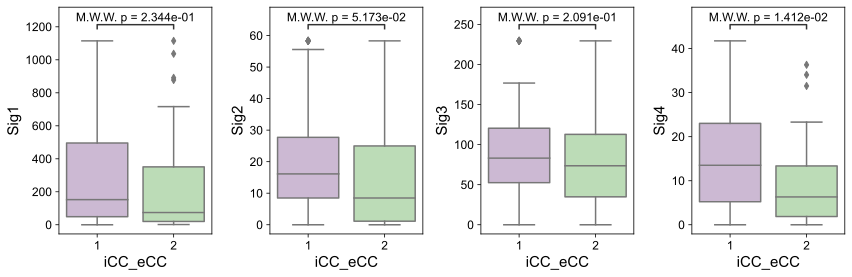

In [78]:
# boxplot
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import seaborn as sns

def capping_outlier(data, col, factor):
    """capping outlier of one column
    
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    col -> str: column name
    
    Return:
    ---------------
    Dataframe: dataframe with capped outlier
    """
    data = data.copy()
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr
    data[col] = data[col].clip(lower_bound, upper_bound)
    return data                             


def boxplot(data=None,
            target=None,
            select_cols=None,
            order=None,
            capping_outliers = True,
            palette=None,
            box_pairs=None,
            test_method='Kruskal',
            text_format='full',
            filename=None,
            outpath=None):
    """boxplot analysis
    
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    target -> str: target column name
    select_cols -> list: list of boxplot variable names
    order -> list: list of order of target variable, example order = [1, 2]
    palette -> list: list of color palette
    box_pairs -> list: Significance level test, example box_pairs = [1, 2]
    test_method -> str: test method, default is 'Kruskal'
    text_format -> dict: text format, 'full' or 'star'
    filename -> str: filename
    outpath -> str: outpath
    
    Return:
    ---------------
    Dataframe: Correaltion of experiments data
    """
    if capping_outliers:
        data = data.copy()
        for i in select_cols:
            data = capping_outlier(data, i, factor=1.5)
    ncols = len(select_cols)
    fig, axes = plt.subplots(1, ncols, figsize=(ncols * 3, 4))
    for col, ax in zip(select_cols, axes.flatten()):
        if order:
            sns.boxplot(x=target, y=col, data=data, order=order, ax=ax, palette=palette)
        else:
            sns.boxplot(x=target, y=col, data=data, ax=ax, palette=palette)
        add_stat_annotation(ax,
                            data=data,
                            x=target,
                            y=col,
                            box_pairs=box_pairs,
                            test=test_method,
                            text_format=text_format,
                            loc='inside',
                            verbose=2)
    plt.tight_layout()
    # plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))

boxplot(data=data, target = 'iCC_eCC', select_cols = ['Sig1', 'Sig2', 'Sig3', 'Sig4'], order = [1, 2], 
        capping_outliers = True, box_pairs = [(1, 2)], text_format = 'full', test_method = 'Mann-Whitney', palette="PRGn")

In [15]:
mutation_matrix

6p22.2 _Amp 6q14.3_Del 1q21.2_Amp 6p21.2_Del ARID1A      TP53 KMT2C  \
CCA_No                                                                        
CCA#32     Mutation         WT   Mutation         WT     WT  Mutation    WT   
CCA#33           WT         WT         WT         WT     WT        WT    WT   
CCA#34           WT         WT         WT         WT     WT        WT    WT   
CCA#36           WT         WT         WT         WT     WT  Mutation    WT   
CCA#37     Mutation   Mutation         WT         WT     WT        WT    WT   
...             ...        ...        ...        ...    ...       ...   ...   
CCA#206          WT         WT         WT         WT     WT        WT    WT   
CCA#207          WT         WT         WT         WT     WT        WT    WT   
CCA#210          WT         WT         WT   Mutation     WT  Mutation    WT   
CCA#215          WT         WT         WT         WT     WT  Mutation    WT   
CCA#216          WT         WT         WT         WT     WT  Mutation    WT   

        DPCR1 BAP1 MGA  ... KRAS PML TET2 NF1     ARID2 MSH6     PBRM1 RBM47  \
CCA_No                  ...                                                    
CCA#32     WT   WT  WT  ...   WT  WT   WT  WT  Mutation   WT        WT    WT   
CCA#33     WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
CCA#34     WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
CCA#36     WT   WT  WT  ...   WT  WT   WT  WT        WT   WT  Mutation    WT   
CCA#37     WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
...       ...  ...  ..  ...  ...  ..  ...  ..       ...  ...       ...   ...   
CCA#206    WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
CCA#207    WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
CCA#210    WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
CCA#215    WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   
CCA#216    WT   WT  WT  ...   WT  WT   WT  WT        WT   WT        WT    WT   

            FGFR2 IDH2  
CCA_No                  
CCA#32         WT   WT  
CCA#33   Mutation   WT  
CCA#34         WT   WT  
CCA#36         WT   WT  
CCA#37         WT   WT  
...           ...  ...  
CCA#206        WT   WT  
CCA#207        WT   WT  
CCA#210        WT   WT  
CCA#215        WT   WT  
CCA#216        WT   WT  

[139 rows x 28 columns]

In [19]:
data = mutation_signature_val.join(mutation_matrix)
data.columns

Index(['time_day', 'age', 'iCC_eCC', 'Sig1', 'Sig2', 'Sig3', 'Sig4',
       'total_perMB', 'log2_TMB', 'StromalScore', 'ImmuneScore',
       'ESTIMATEScore', 'TumorPurity', 'ImmuneScore_Xcell',
       'StromaScore_Xcell', 'MicroenvironmentScore_Xcell', '6p22.2 _Amp',
       '6q14.3_Del', '1q21.2_Amp', '6p21.2_Del', 'ARID1A', 'TP53', 'KMT2C',
       'DPCR1', 'BAP1', 'MGA', 'KMT2A', 'KMT2D', 'APC', 'IDH1', 'SMAD4', 'ATM',
       'NCOR1', 'EPHA2', 'KRAS', 'PML', 'TET2', 'NF1', 'ARID2', 'MSH6',
       'PBRM1', 'RBM47', 'FGFR2', 'IDH2'],
      dtype='object')

In [54]:
AA_signature = data_sig_mut[['TP53','KRAS','ARID2','MSH6','total_perMB','ImmuneScore','Sig1','Sig4']]
# AA_signature.reset_index(inplace = True)
AA_signature.to_csv("/Volumes/Samsung_T5/downloads/Integrated_multiomics_analysis_CCA/data/Fig1/fig1f/AA_signature_mutation.csv")
# AA_signature_L = AA_signature.melt(id_vars=['TP53', 'KRAS','ARID2'], value_vars=['Sig4'],value_name="value",var_name="Group")

WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.022e-01 U_stat=1.140e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.511e-02 U_stat=9.690e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.814e-02 U_stat=9.470e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.155e-01 U_stat=1.326e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.140e-03 U_stat=8.775e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.192e-03 U_stat=8.780e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.200e-01 U_stat=1.327e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.311e-01 U_stat=1.480e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni c

/Applications/Anaconda_3/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.821e-01 U_stat=5.325e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.965e-01 U_stat=4.590e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.226e-01 U_stat=6.070e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.312e-01 U_stat=5.700e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.734e-01 U_stat=4.255e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.617e-01 U_stat=4.210e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.127e-01 U_stat=6.760e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.968e-01 U_stat=4.590e+02
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni c

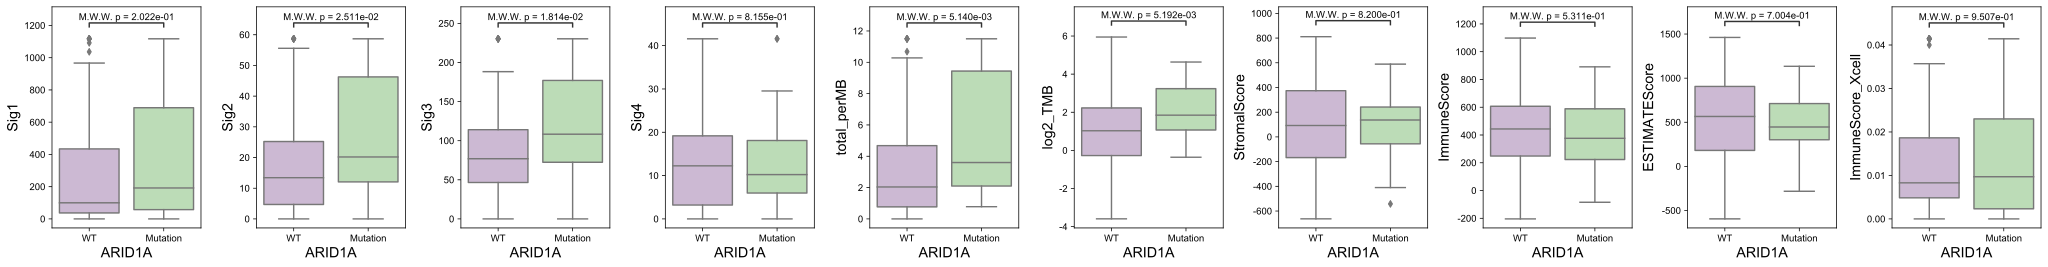

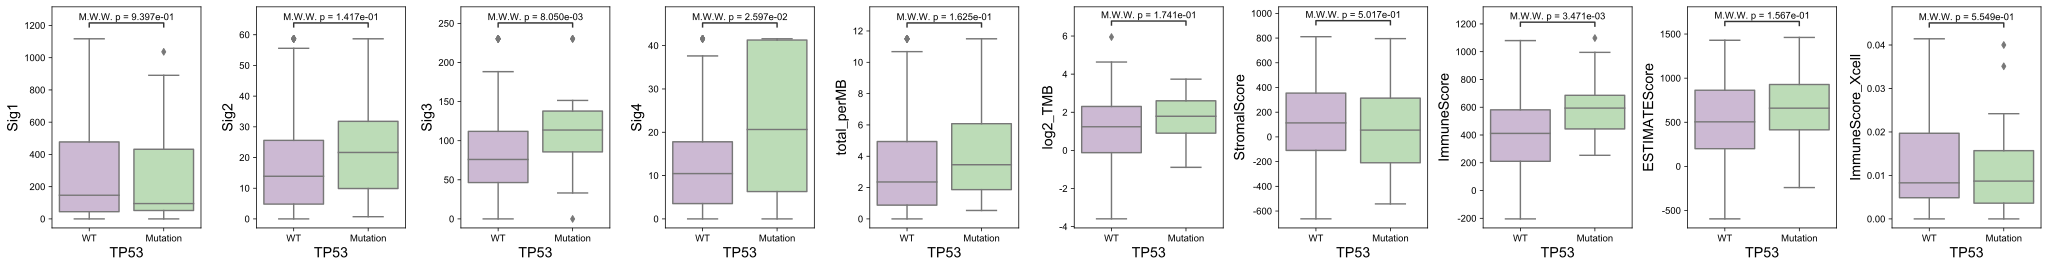

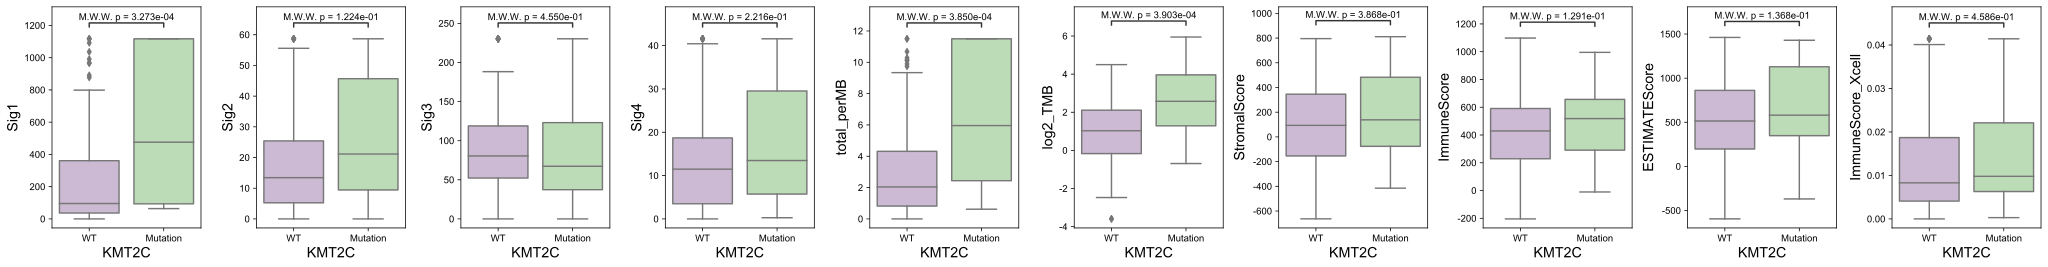

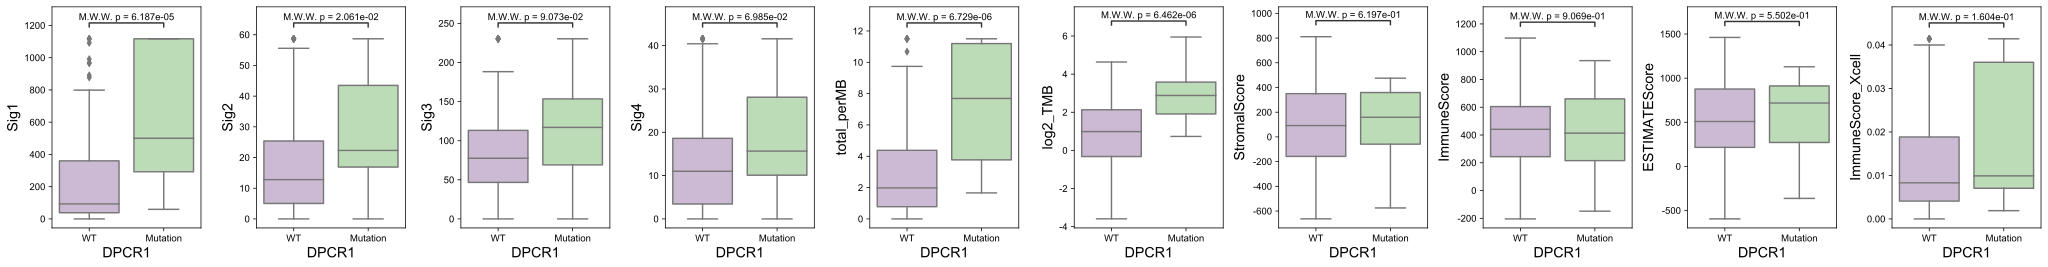

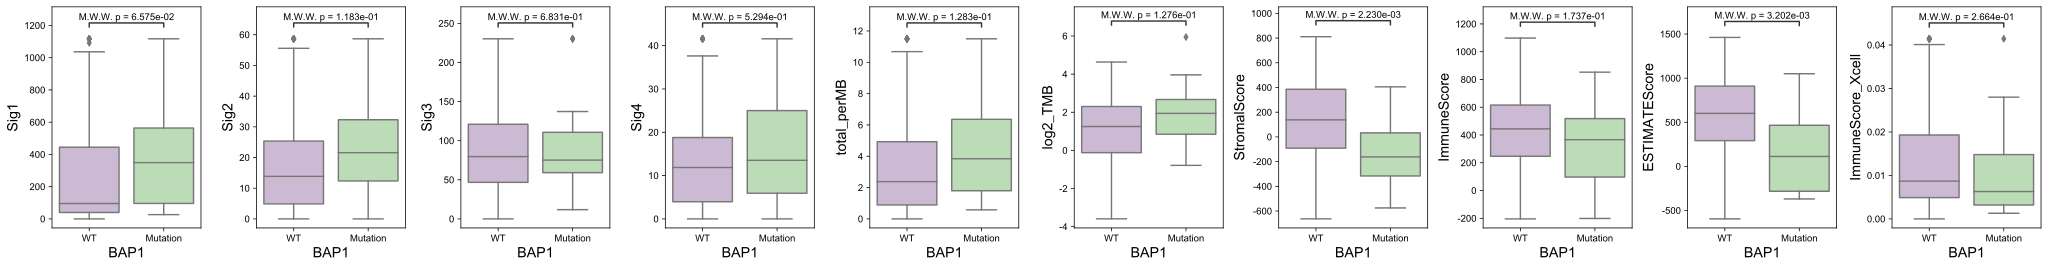

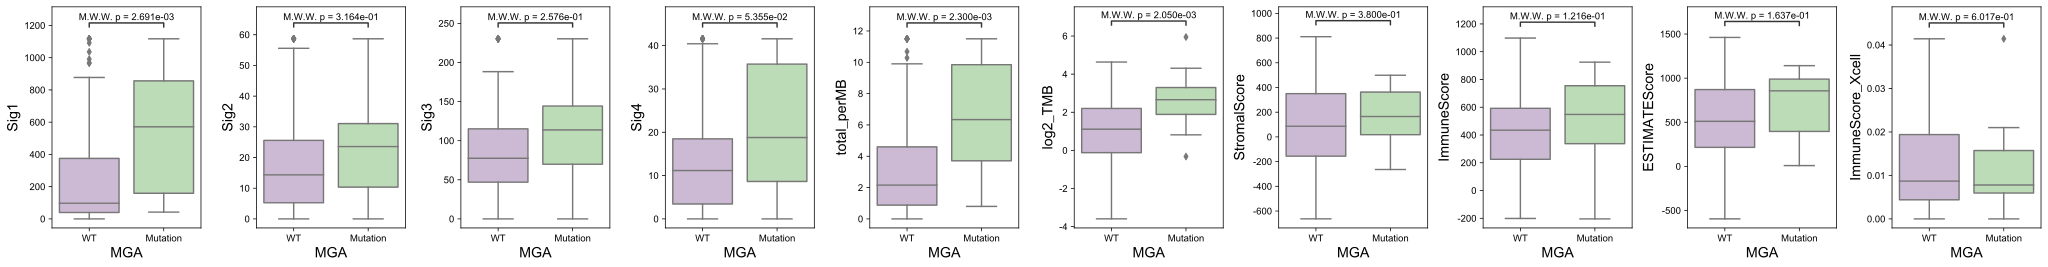

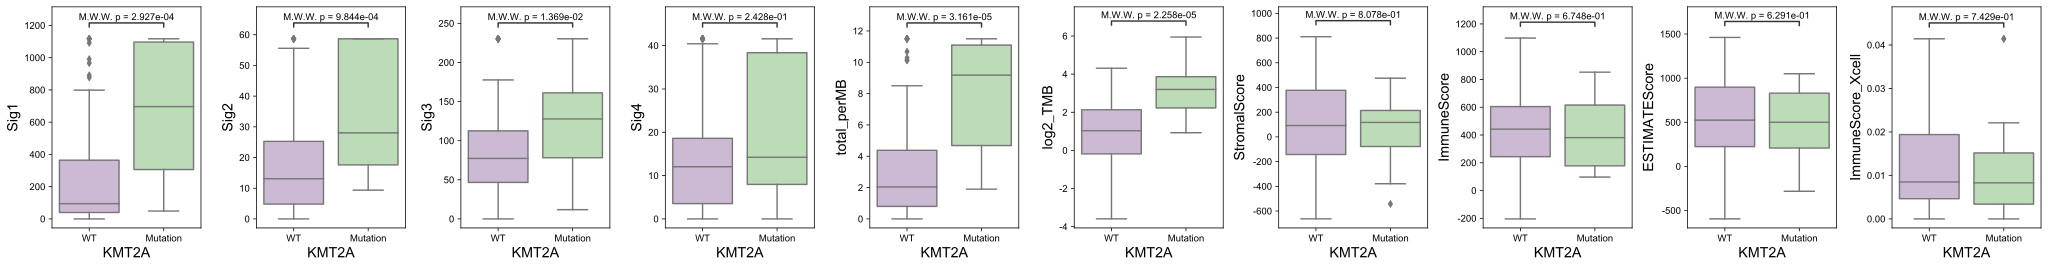

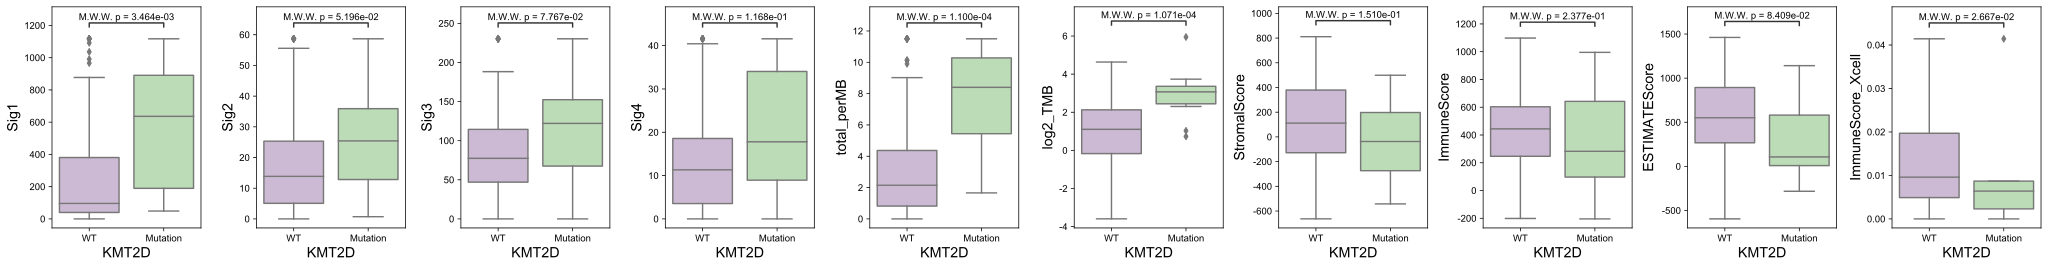

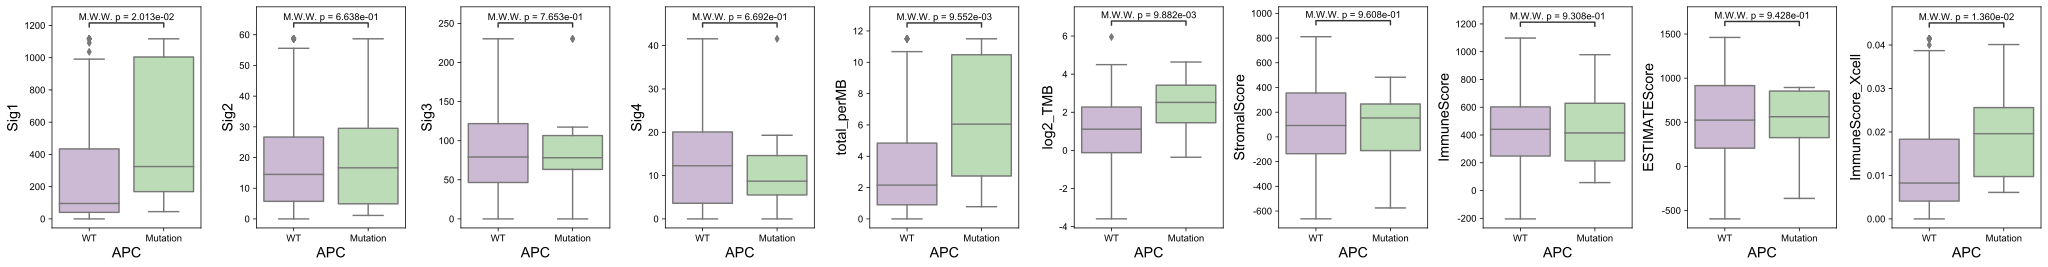

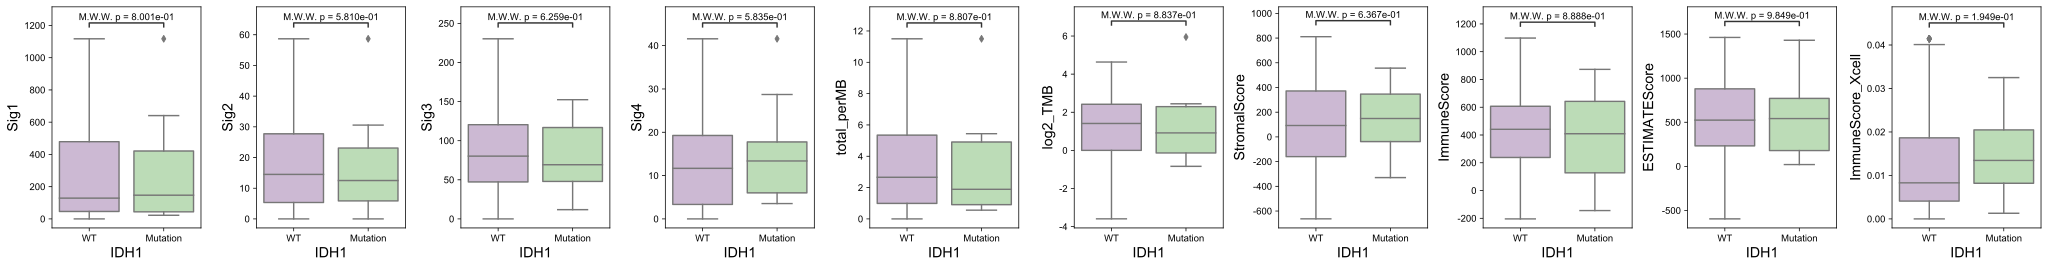

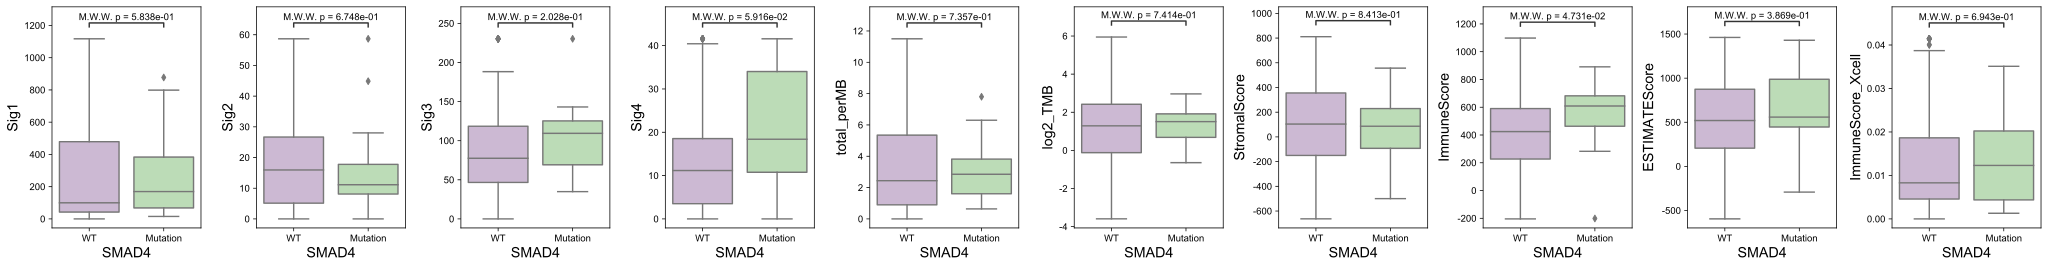

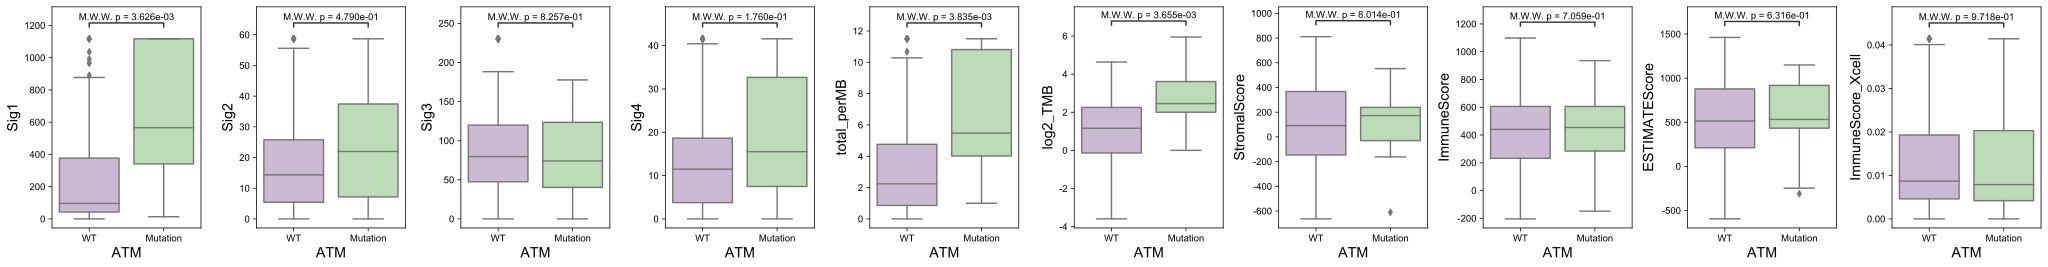

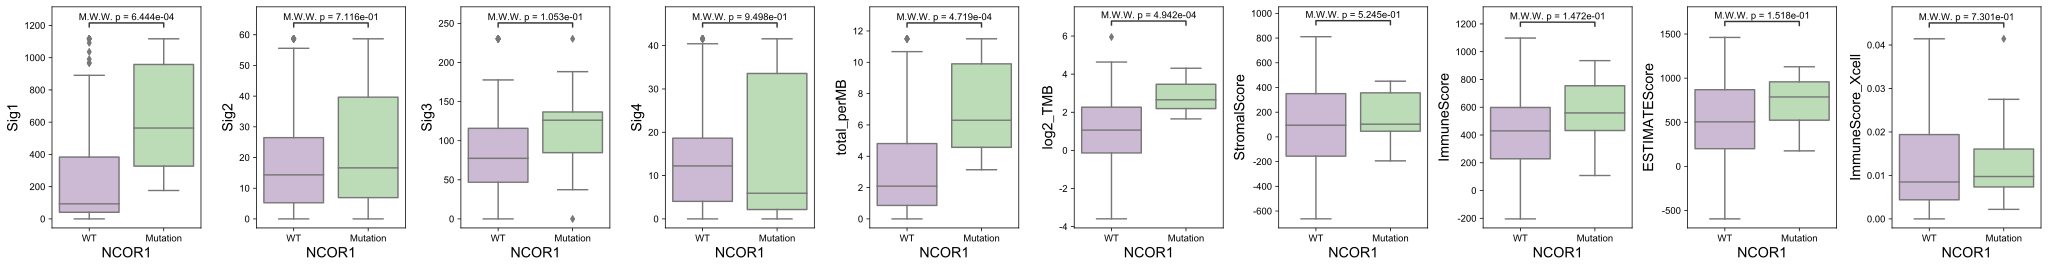

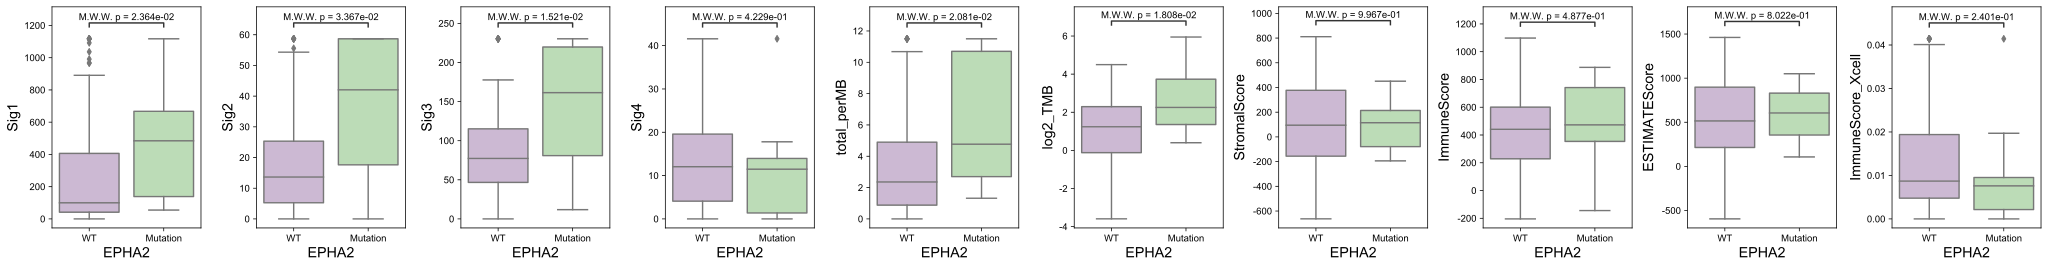

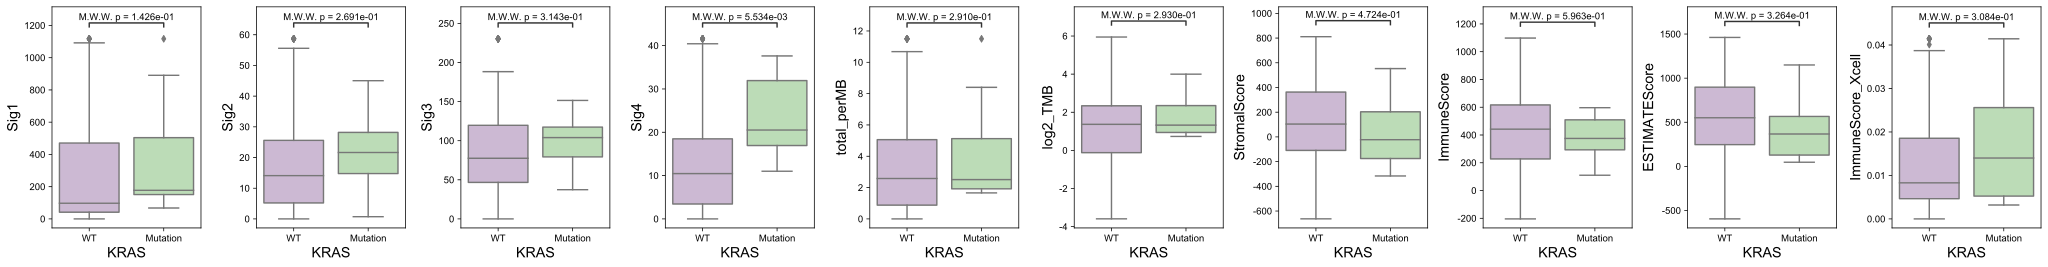

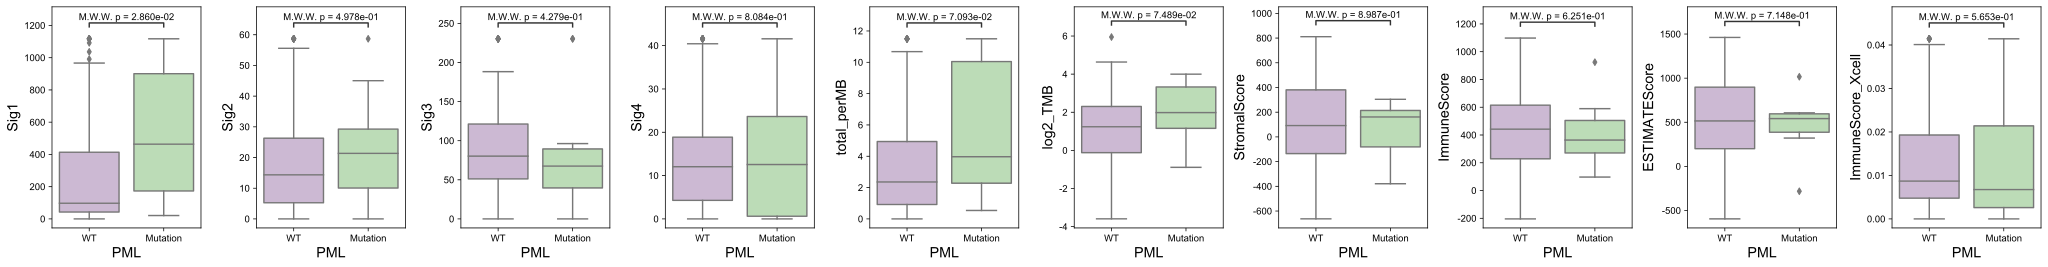

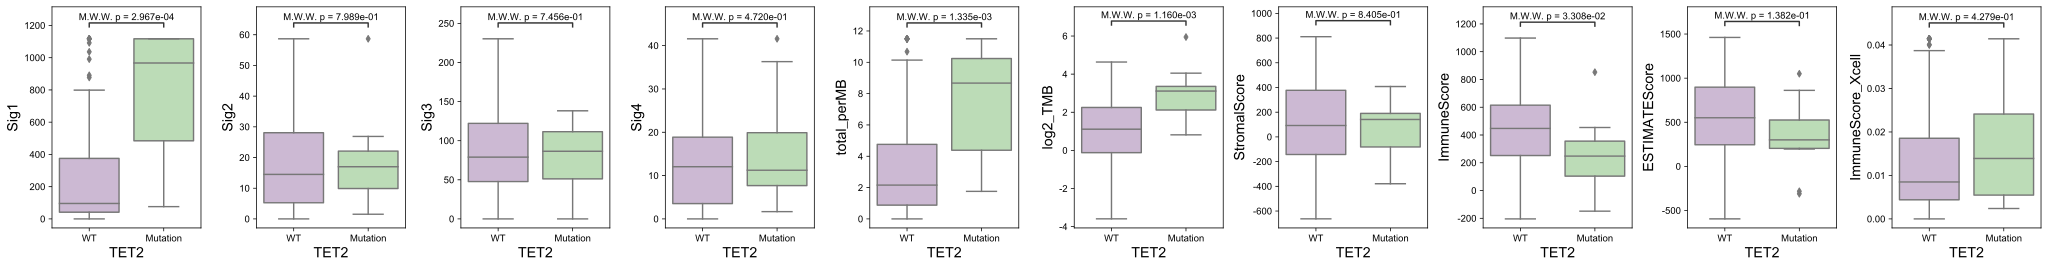

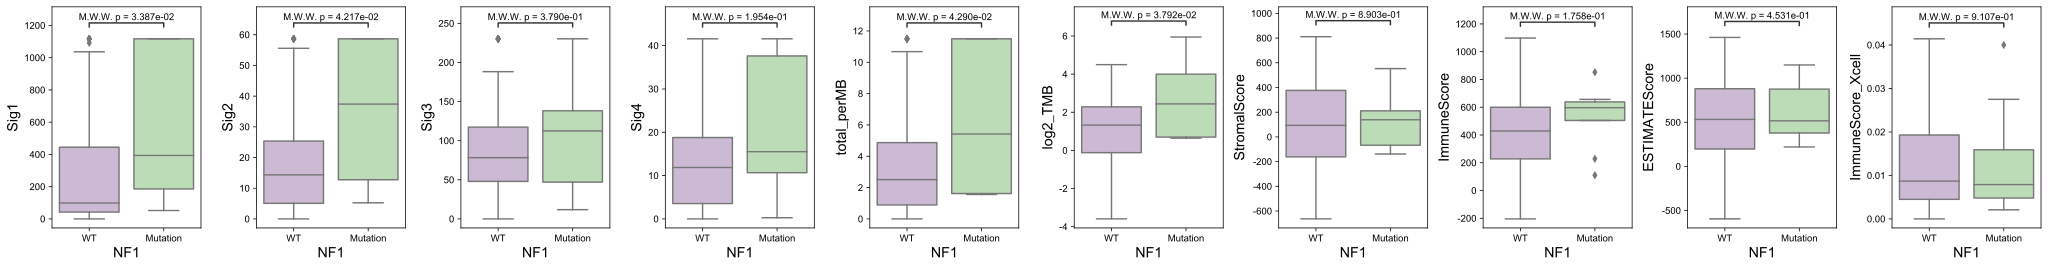

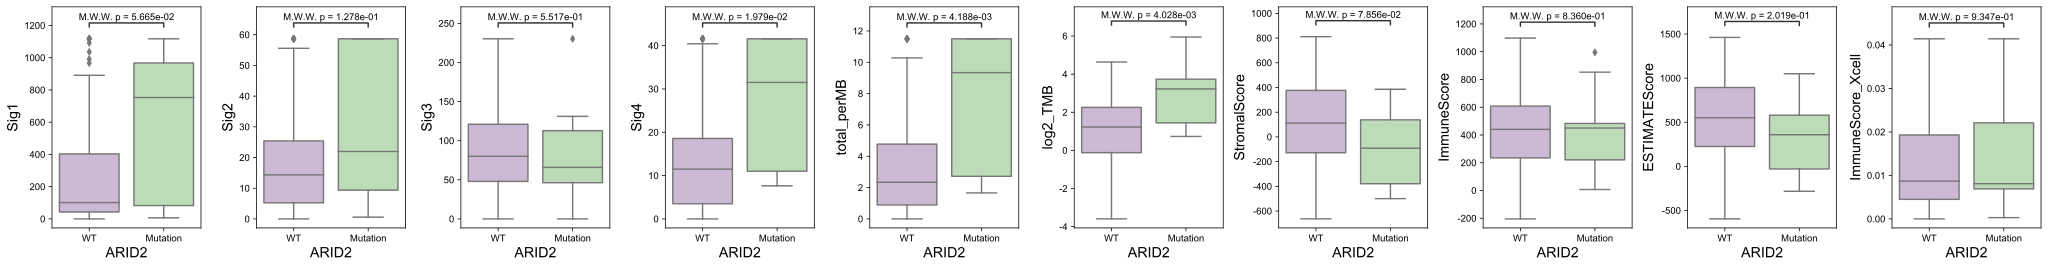

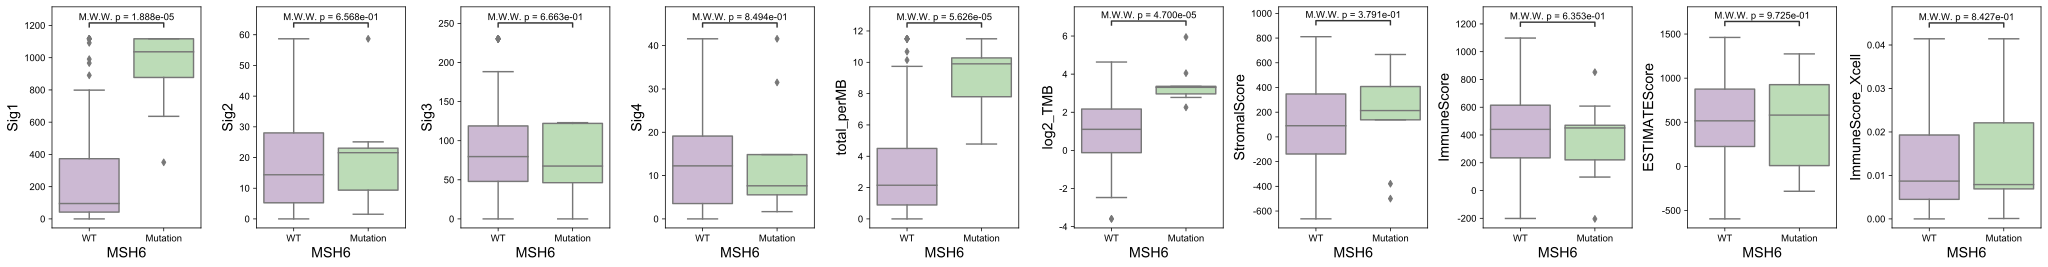

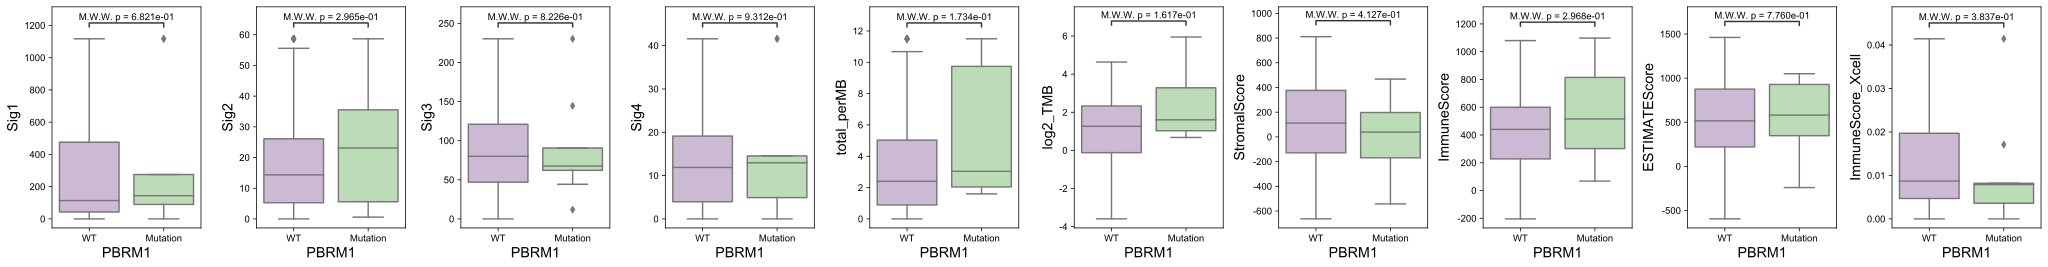

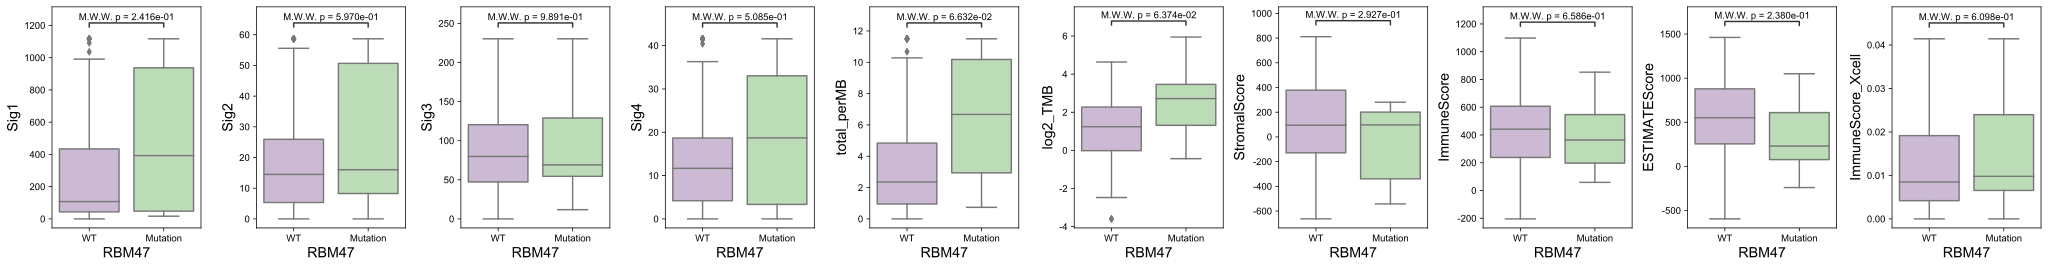

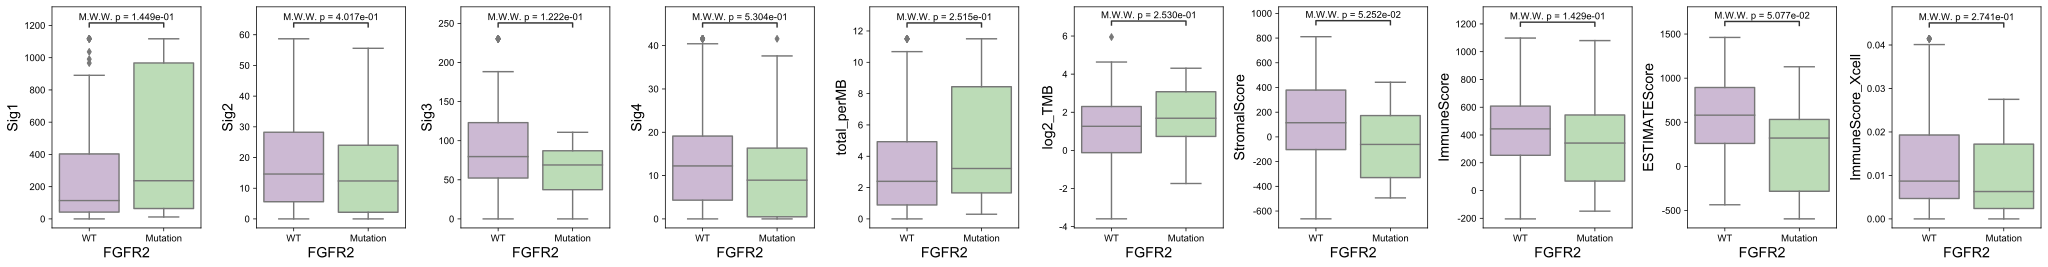

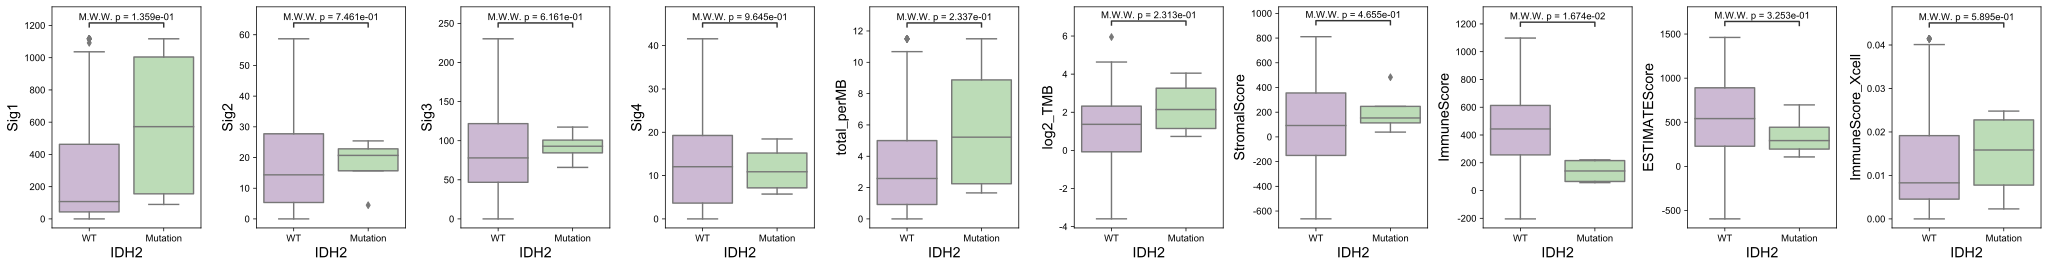

In [33]:
## for loop check the significance mutation
mut_list = [ 'ARID1A', 'TP53', 'KMT2C',
       'DPCR1', 'BAP1', 'MGA', 'KMT2A', 'KMT2D', 'APC', 'IDH1', 'SMAD4', 'ATM',
       'NCOR1', 'EPHA2', 'KRAS', 'PML', 'TET2', 'NF1', 'ARID2', 'MSH6',
       'PBRM1', 'RBM47', 'FGFR2', 'IDH2']

# mut_list = ['FGFR2']
for gene in mut_list:
    boxplot(data=data_sig_mut, target = gene, select_cols = ['Sig1', 'Sig2', 'Sig3', 'Sig4','total_perMB', 'log2_TMB', 'StromalScore', 'ImmuneScore',
       'ESTIMATEScore','ImmuneScore_Xcell'], order = ['WT', 'Mutation'], 
            capping_outliers = True, box_pairs = [('WT', 'Mutation')], text_format = 'full', test_method = 'Mann-Whitney', palette="PRGn")

Mutation v.s. WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.214e-01 U_stat=2.022e+03
Mutation v.s. WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.811e-01 U_stat=1.768e+03
Mutation v.s. WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.397e-02 U_stat=2.115e+03
Mutation v.s. WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.768e-01 U_stat=1.889e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.361e-01 U_stat=1.715e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.187e-01 U_stat=1.782e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.148e-01 U_stat=1.746e+03
WT v.s. Mutation: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.139e-01 U_stat=1.841e+03
Mutation v.s. WT: Mann-Whitney-Wilcoxon test two-sided with Bonferroni c

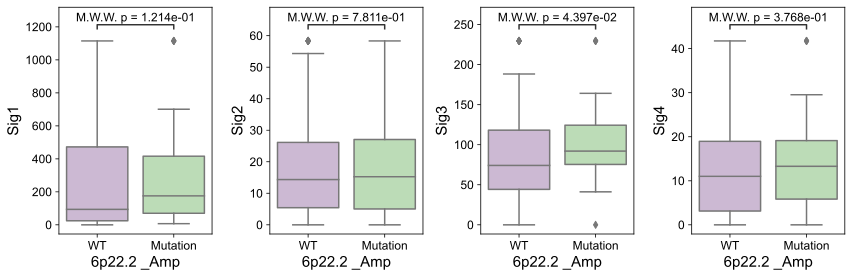

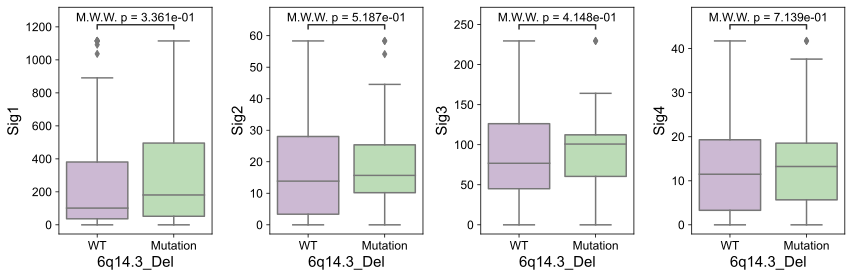

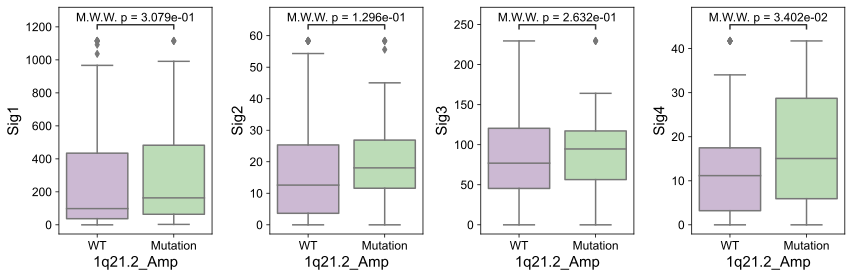

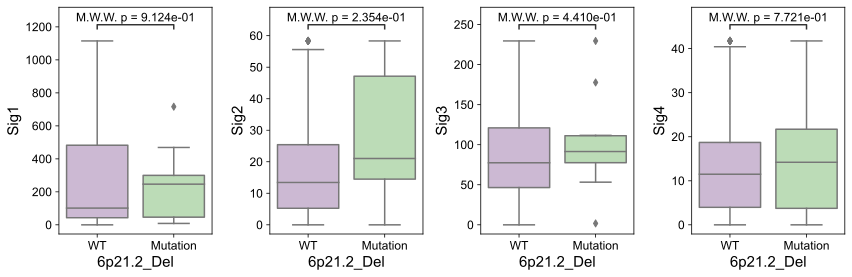

In [65]:
mut_list = ['6p22.2 _Amp', '6q14.3_Del', '1q21.2_Amp', '6p21.2_Del']
for gene in mut_list:
    boxplot(data=data_sig_mut, target = gene, select_cols = ['Sig1', 'Sig2', 'Sig3', 'Sig4'], order = ['WT', 'Mutation'], 
            capping_outliers = True, box_pairs = [('WT', 'Mutation')], text_format = 'full', test_method = 'Mann-Whitney', palette="PRGn")

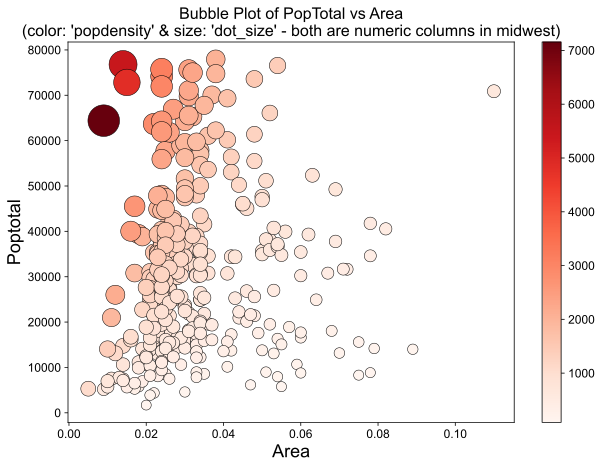

In [184]:
# Scatterplot with varying size and color of points
import pandas as pd

midwest = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv"
)

# Plot
fig = plt.figure(figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter('area',
            'poptotal',
            data=midwest,
            s='dot_size',
            c='popdensity',
            cmap='Reds',
            edgecolors='black',
            linewidths=.5)
plt.title(
    "Bubble Plot of PopTotal vs Area\n(color: 'popdensity' & size: 'dot_size' - both are numeric columns in midwest)",
    fontsize=16)
plt.xlabel('Area', fontsize=18)
plt.ylabel('Poptotal', fontsize=18)
plt.colorbar()
plt.show()
